In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, matthews_corrcoef

In [2]:
str_results = pd.read_csv("../run_all_models_scripts/structural_model_held_out_test_results.csv")
phy_results = pd.read_csv("../run_all_models_scripts/physicochemical_model_held_out_test_results.csv")
img_results = pd.read_csv("../run_all_models_scripts/cellpainting_model_held_out_test_results.csv")
ge_results = pd.read_csv("../run_all_models_scripts/LINCSL1000_model_held_out_test_results.csv")
go_results = pd.read_csv("../run_all_models_scripts/GO_model_held_out_test_results.csv")
pid_results = pd.read_csv("../run_all_models_scripts/CellScape_model_held_out_test_results.csv") 
pid_cmu_results = pd.read_csv("../run_all_models_scripts/CellScape_Cmax_unbound_model_held_out_test_results.csv") 
pid_cmt_results = pd.read_csv("../run_all_models_scripts/CellScape_Cmax_total_model_held_out_test_results.csv") 
moa_results = pd.read_csv("../run_all_models_scripts/MOA_model_held_out_test_results.csv") 
moa_cmu_results = pd.read_csv("../run_all_models_scripts/MOA_Cmax_unbound_model_held_out_test_results.csv") 
moa_cmt_results = pd.read_csv("../run_all_models_scripts/MOA_Cmax_total_model_held_out_test_results.csv") 

str_results["Features"] ="Structural"
phy_results["Features"] ="Mordred"
img_results["Features"] ="Cell Painting"
ge_results["Features"] ="LINCSL1000"
go_results["Features"] ="GeneOntology"
pid_results["Features"] ="CellScape"
pid_cmu_results["Features"] ="CellScape with Cmax unbound"
pid_cmt_results["Features"] ="CellScape with Cmax total"
moa_results["Features"] ="MOA"
moa_cmu_results["Features"] ="MOA with Cmax unbound"
moa_cmt_results["Features"] ="MOA with Cmax total"

In [3]:
ensemble_all_results = pd.read_csv("../10_evaluate_classification/Ensemble_all_models__held_out_test_results.csv") 
ensemble_selected_results = pd.read_csv("../10_evaluate_classification/Ensemble_selected_models__held_out_test_results.csv") 

ensemble_all_results["Features"] ="Ensemble (all models)"
ensemble_selected_results["Features"] ="Ensemble (selected models)"

In [4]:
allresults = pd.concat([str_results, phy_results, img_results, ge_results, go_results, pid_results,  
                        pid_cmu_results, pid_cmt_results,  moa_results, moa_cmu_results,
                        moa_cmt_results, ensemble_all_results, ensemble_selected_results]).sort_values(["Dataset", "SMILES"],
                                                  ascending=[False, False]).reset_index(drop=True)
allresults

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features
0,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.574822,0.516513,Structural
1,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.611409,0.541405,Mordred
2,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,0,0.475658,0.625358,Cell Painting
3,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.749799,0.649557,LINCSL1000
4,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.732849,0.646474,GeneOntology
...,...,...,...,...,...,...,...,...
5714,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,1,0.680339,0.660530,CellScape
5715,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,0,0.644047,0.668763,CellScape with Cmax total
5716,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,0,0.459264,0.482587,MOA
5717,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,1,0.562222,0.538975,MOA with Cmax total


In [5]:
allresults.Features.unique()

array(['Structural', 'Mordred', 'Cell Painting', 'LINCSL1000',
       'GeneOntology', 'CellScape', 'MOA', 'Ensemble (all models)',
       'Ensemble (selected models)', 'CellScape with Cmax unbound',
       'CellScape with Cmax total', 'MOA with Cmax unbound',
       'MOA with Cmax total'], dtype=object)

In [6]:
def scale_probability(prob, threshold):
    if prob <= threshold:
        return prob / (2 * threshold)
    else:
        return 1 - (1 - prob) / (2 * (1 - threshold))

allresults['Scaled_Probability'] = allresults.apply(lambda row: scale_probability(row['Probability'], row['Best_Threshold']), axis=1)
allresults

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features,Scaled_Probability
0,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.574822,0.516513,Structural,0.560300
1,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.611409,0.541405,Mordred,0.576324
2,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,0,0.475658,0.625358,Cell Painting,0.380309
3,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.749799,0.649557,LINCSL1000,0.643021
4,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.732849,0.646474,GeneOntology,0.622163
...,...,...,...,...,...,...,...,...,...
5714,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,1,0.680339,0.660530,CellScape,0.529177
5715,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,0,0.644047,0.668763,CellScape with Cmax total,0.481521
5716,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,0,0.459264,0.482587,MOA,0.475835
5717,DICTrank,DICTrank,C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl,1.0,1,0.562222,0.538975,MOA with Cmax total,0.525212


In [7]:
DICTrank_train = pd.read_csv("../data/processed_binarised__splits/DICTrank/DICTrank_train.csv.gz", compression="gzip")
DICTrank_train

,Standardized_SMILES,Standardized_InChI,DICTrank
0,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
2,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
3,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1
4,C[NH+](C)C(=O)C(CC[NH+]1CCC(O)(c2ccc(Cl)cc2)CC...,InChI=1S/C29H33ClN2O2/c1-31(2)27(33)29(24-9-5-...,1
...,...,...,...
925,CCCCC1(CCCC)CN(c2ccccc2)c2cc(SC)c(OCC(=O)NC(C(...,InChI=1S/C37H48N4O8S2/c1-5-8-19-37(20-9-6-2)24...,0
926,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
927,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
928,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0


In [8]:
DICTrank_test= pd.read_csv("../data/processed_binarised__splits/DICTrank/DICTrank_test.csv.gz", compression="gzip")
DICTrank_test

,Standardized_SMILES,Standardized_InChI,DICTrank
0,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
1,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
2,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1
3,CC(=O)[NH+]1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(...,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,1
4,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,InChI=1S/C18H19N3O/c1-12-19-9-10-21(12)11-13-7...,1
...,...,...,...
85,CCC1(c2ccccc2)C(=O)NCNC1=O,InChI=1S/C12H14N2O2/c1-2-12(9-6-4-3-5-7-9)10(1...,0
86,CCOC(=O)[NH+]1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15...,0
87,CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1,InChI=1S/C12H14N3O2S/c1-3-6-18-8-4-5-9-10(7-8)...,0
88,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0


In [9]:
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.metrics.pairwise import pairwise_distances

def get_morgan_fingerprints(smiles_list):
    fps = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        arr = np.zeros((0,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fps.append(arr)
    return np.array(fps)

def mean_tanimoto_similarity(test_df, train_df, class_col):
    # Get Morgan fingerprints
    test_fps = get_morgan_fingerprints(test_df['Standardized_SMILES'])
    train_fps = get_morgan_fingerprints(train_df['Standardized_SMILES'])
    
    # Compute 1 - Tanimoto to treat it as a distance
    distances = pairwise_distances(test_fps, train_fps, metric='jaccard')
    
    mean_sims = []
    for i, test_smi in test_df.iterrows():
        # Get the class of the current test sample
        current_class = test_smi[class_col]
        
        # Get indices of train samples with the same class
        same_class_indices = train_df[train_df[class_col] == current_class].index
        
        # Get distances to the samples of the same class
        same_class_distances = distances[i, same_class_indices]
        
        # Get 3 smallest distances (i.e., largest similarities)
        sorted_indices = np.argsort(same_class_distances)
        nn_indices = sorted_indices[:1] #number of neighbouts
        
        # Convert distances back to similarities
        nn_similarities = 1 - same_class_distances[nn_indices]
        
        # Take the mean of the 3-nn similarities
        mean_sims.append(np.mean(nn_similarities))
    
    return mean_sims

# Use the function
test_df = DICTrank_test
train_df = DICTrank_train
class_col = "DICTrank"

mean_similarities = mean_tanimoto_similarity(test_df, train_df, class_col)
test_df['Mean_Tanimoto_Similarity'] = mean_similarities
test_df

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,Standardized_SMILES,Standardized_InChI,DICTrank,Mean_Tanimoto_Similarity
0,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0.333333
1,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0.500000
2,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1,0.675676
3,CC(=O)[NH+]1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(...,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,1,0.525773
4,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,InChI=1S/C18H19N3O/c1-12-19-9-10-21(12)11-13-7...,1,0.397059
...,...,...,...,...
85,CCC1(c2ccccc2)C(=O)NCNC1=O,InChI=1S/C12H14N2O2/c1-2-12(9-6-4-3-5-7-9)10(1...,0,0.317073
86,CCOC(=O)[NH+]1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15...,0,0.568966
87,CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1,InChI=1S/C12H14N3O2S/c1-3-6-18-8-4-5-9-10(7-8)...,0,0.222222
88,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0,0.245283


In [10]:
test_df_similarity_nn = test_df
test_df_similarity_nn

,Standardized_SMILES,Standardized_InChI,DICTrank,Mean_Tanimoto_Similarity
0,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0.333333
1,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0.500000
2,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1,0.675676
3,CC(=O)[NH+]1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(...,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,1,0.525773
4,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,InChI=1S/C18H19N3O/c1-12-19-9-10-21(12)11-13-7...,1,0.397059
...,...,...,...,...
85,CCC1(c2ccccc2)C(=O)NCNC1=O,InChI=1S/C12H14N2O2/c1-2-12(9-6-4-3-5-7-9)10(1...,0,0.317073
86,CCOC(=O)[NH+]1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15...,0,0.568966
87,CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1,InChI=1S/C12H14N3O2S/c1-3-6-18-8-4-5-9-10(7-8)...,0,0.222222
88,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0,0.245283


In [11]:
from sklearn.metrics import precision_recall_curve, auc

def balanced_accuracy(group):
    tp = sum((group['DICTrank'] == 1) & (group['Prediction'] == 1))
    tn = sum((group['DICTrank'] == 0) & (group['Prediction'] == 0))
    fp = sum((group['DICTrank'] == 0) & (group['Prediction'] == 1))
    fn = sum((group['DICTrank'] == 1) & (group['Prediction'] == 0))

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    return (sensitivity + specificity) / 2

def sensitivity(group):
    tp = sum((group['DICTrank'] == 1) & (group['Prediction'] == 1))
    tn = sum((group['DICTrank'] == 0) & (group['Prediction'] == 0))
    fp = sum((group['DICTrank'] == 0) & (group['Prediction'] == 1))
    fn = sum((group['DICTrank'] == 1) & (group['Prediction'] == 0))

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
   

    return (sensitivity) 

def specificity(group):
    tp = sum((group['DICTrank'] == 1) & (group['Prediction'] == 1))
    tn = sum((group['DICTrank'] == 0) & (group['Prediction'] == 0))
    fp = sum((group['DICTrank'] == 0) & (group['Prediction'] == 1))
    fn = sum((group['DICTrank'] == 1) & (group['Prediction'] == 0))

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    return (specificity)

def aucpr(group):
    precision, recall, _ = precision_recall_curve(group['DICTrank'], group['Scaled_Probability'])
    return auc(recall, precision)

In [12]:
dataset_results

NameError: name 'dataset_results' is not defined

cardiotox_with_sider_inactives
119


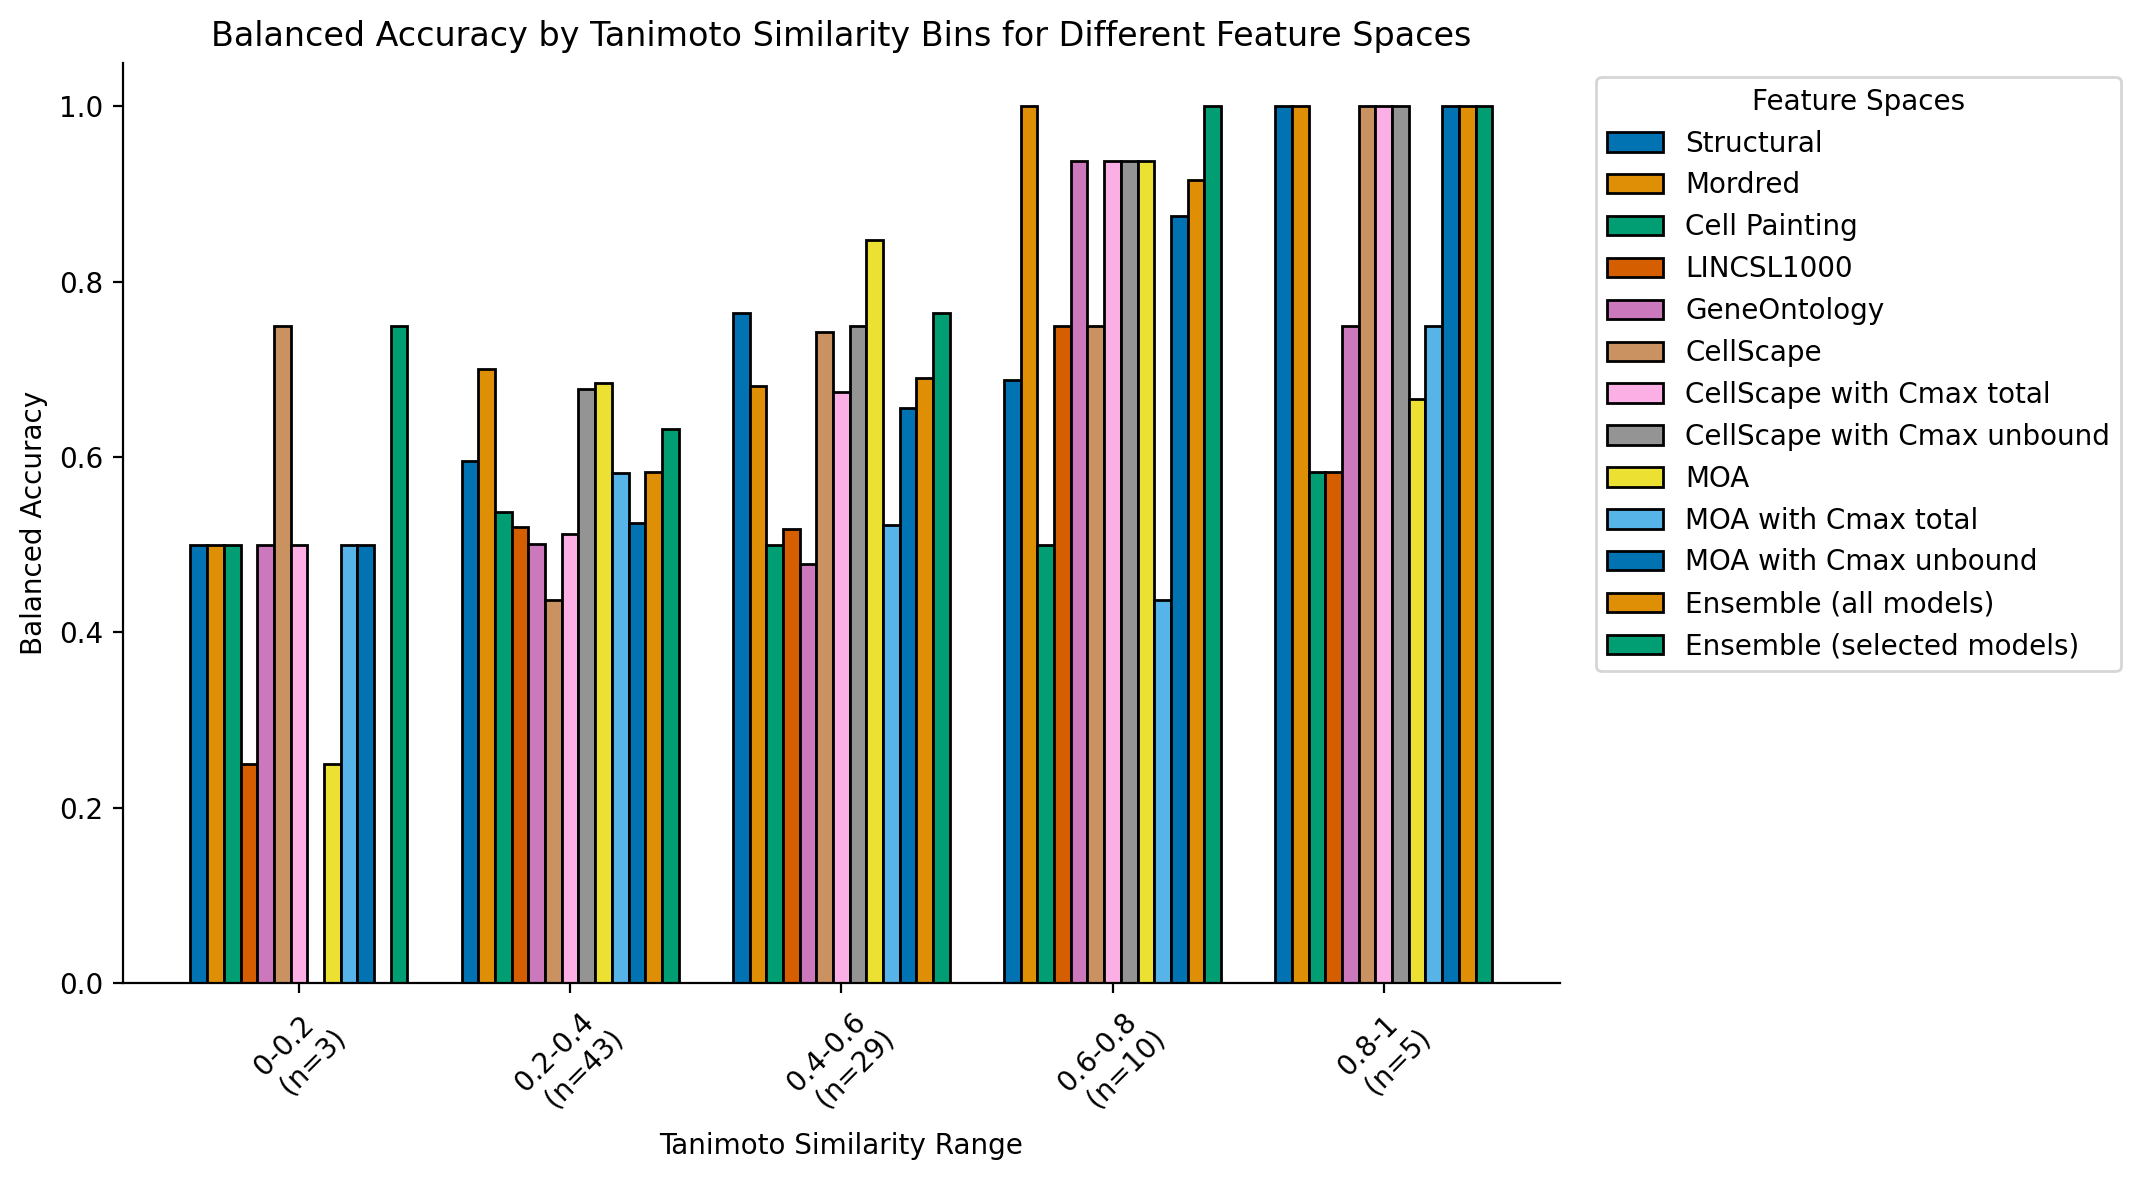

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


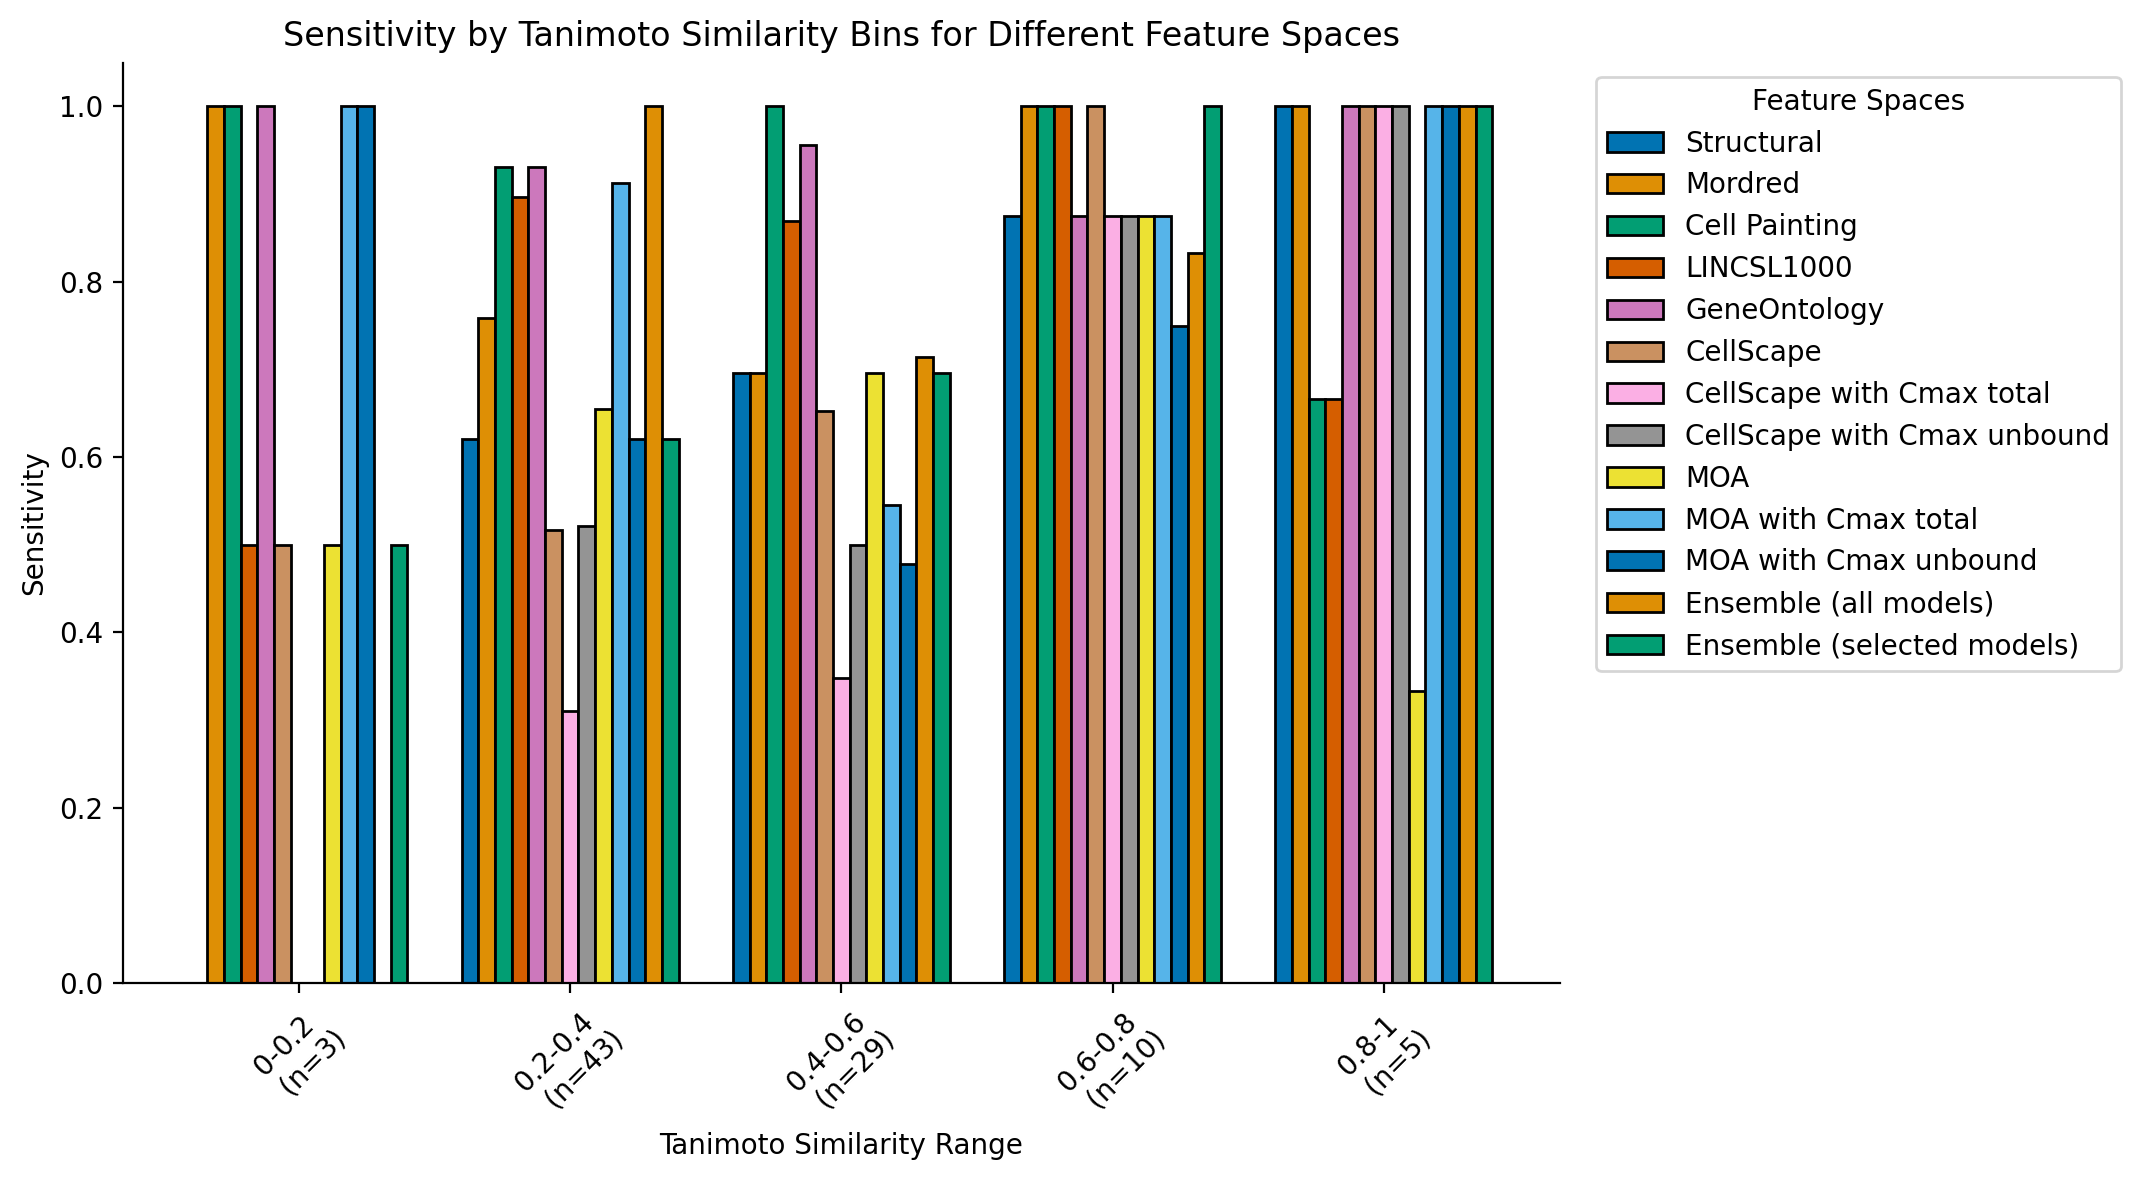

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


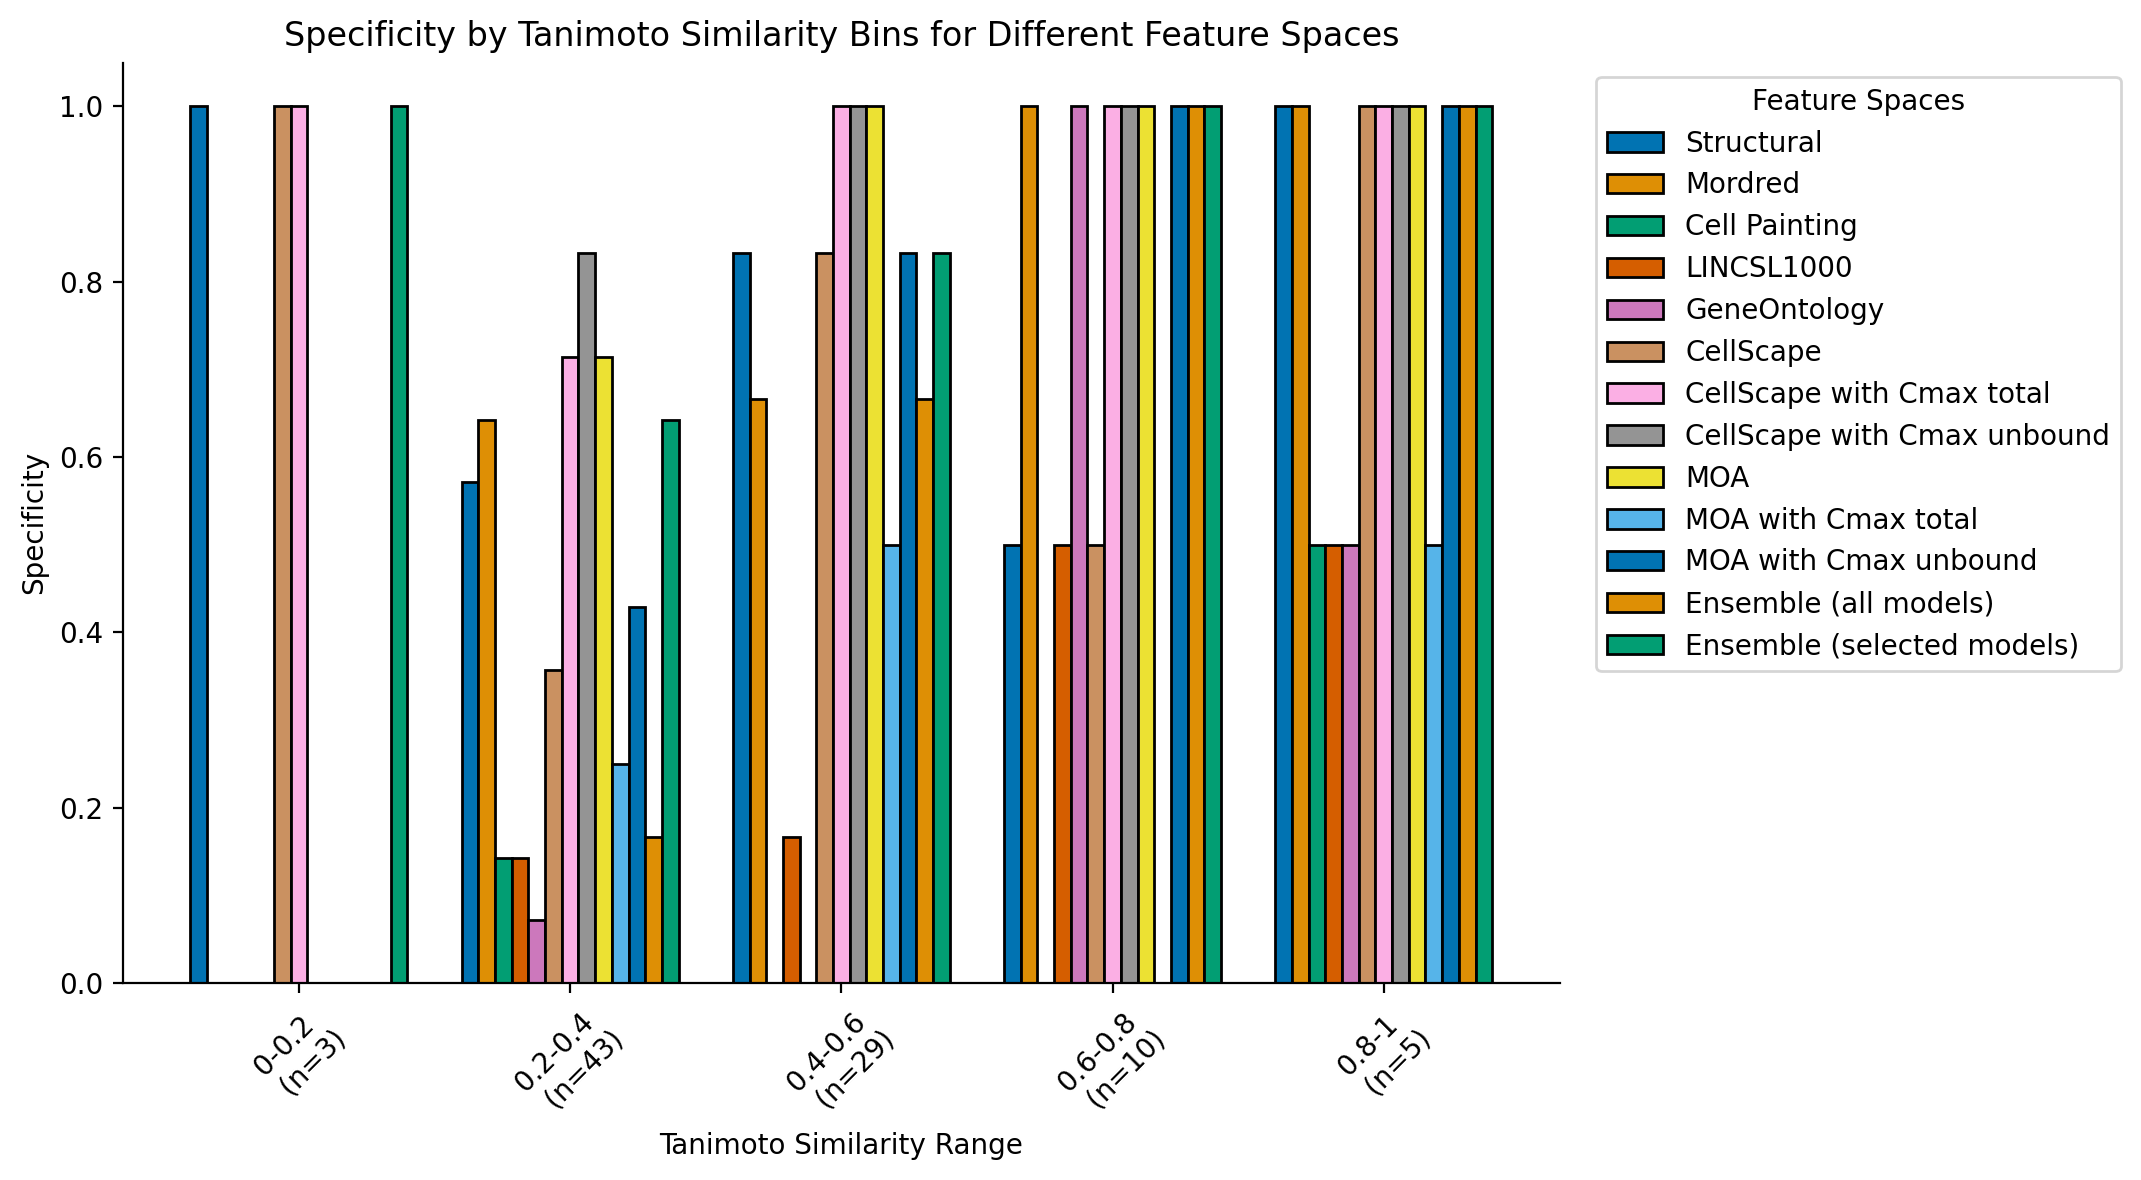

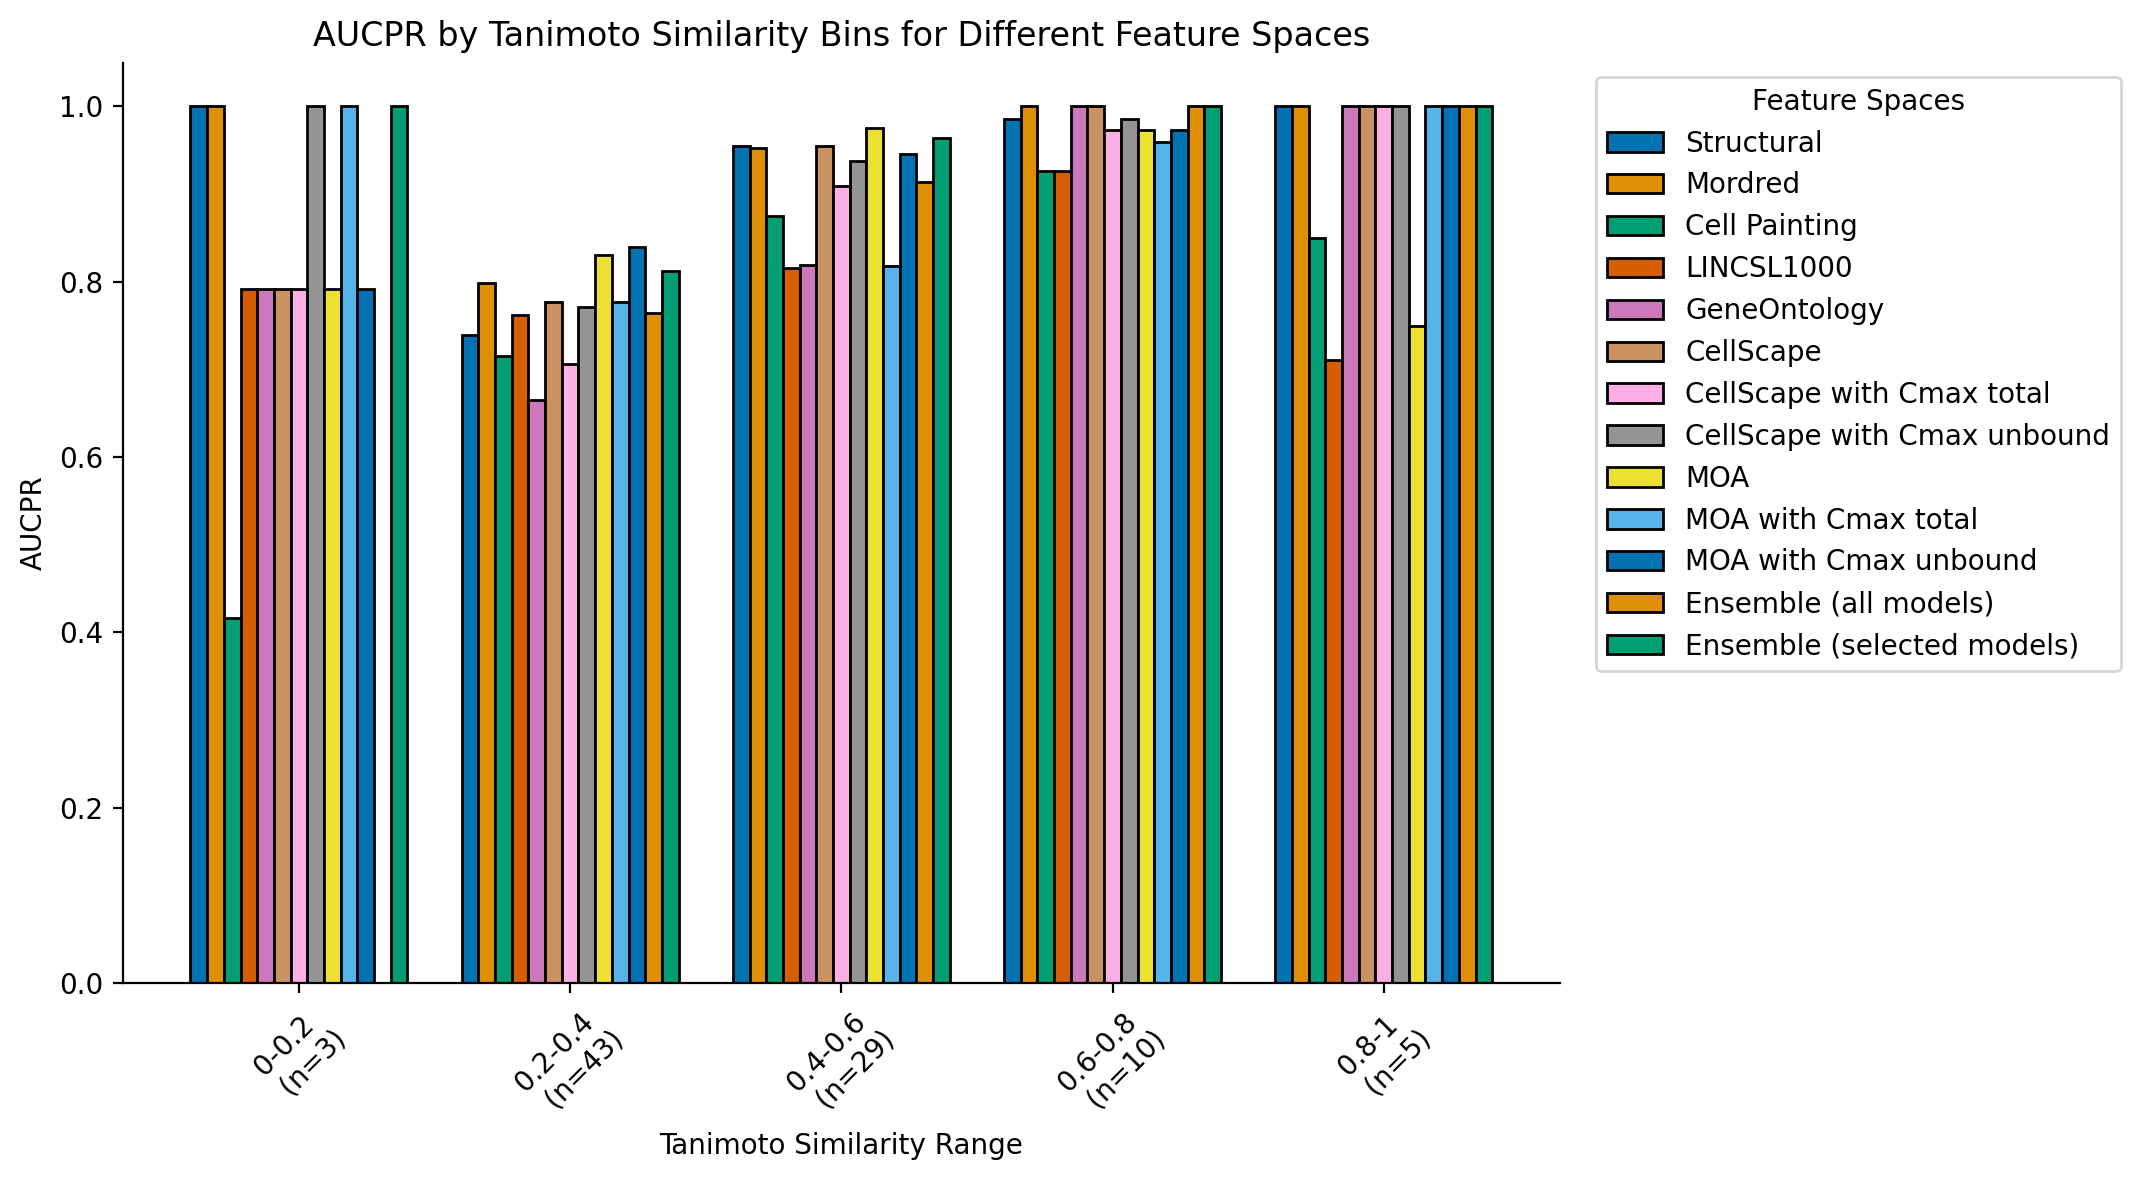

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  LINCSL1000  \
similarity_bin                                                       
0-0.2 \n (n=3)       1.000000  1.000000       0.416667    0.791667   
0.2-0.4 \n (n=43)    0.739592  0.798862       0.715762    0.762041   
0.4-0.6 \n (n=29)    0.954985  0.952522       0.875356    0.815212   
0.6-0.8 \n (n=10)    0.985243  1.000000       0.926240    0.926240   
0.8-1 \n (n=5)       1.000000  1.000000       0.850000    0.711111   

Features           GeneOntology  CellScape  CellScape with Cmax total  \
similarity_bin                                                          
0-0.2 \n (n=3)         0.791667   0.791667                   0.791667   
0.2-0.4 \n (n=43)      0.665598   0.776835                   0.706304   
0.4-0.6 \n (n=29)      0.819560   0.954941                   0

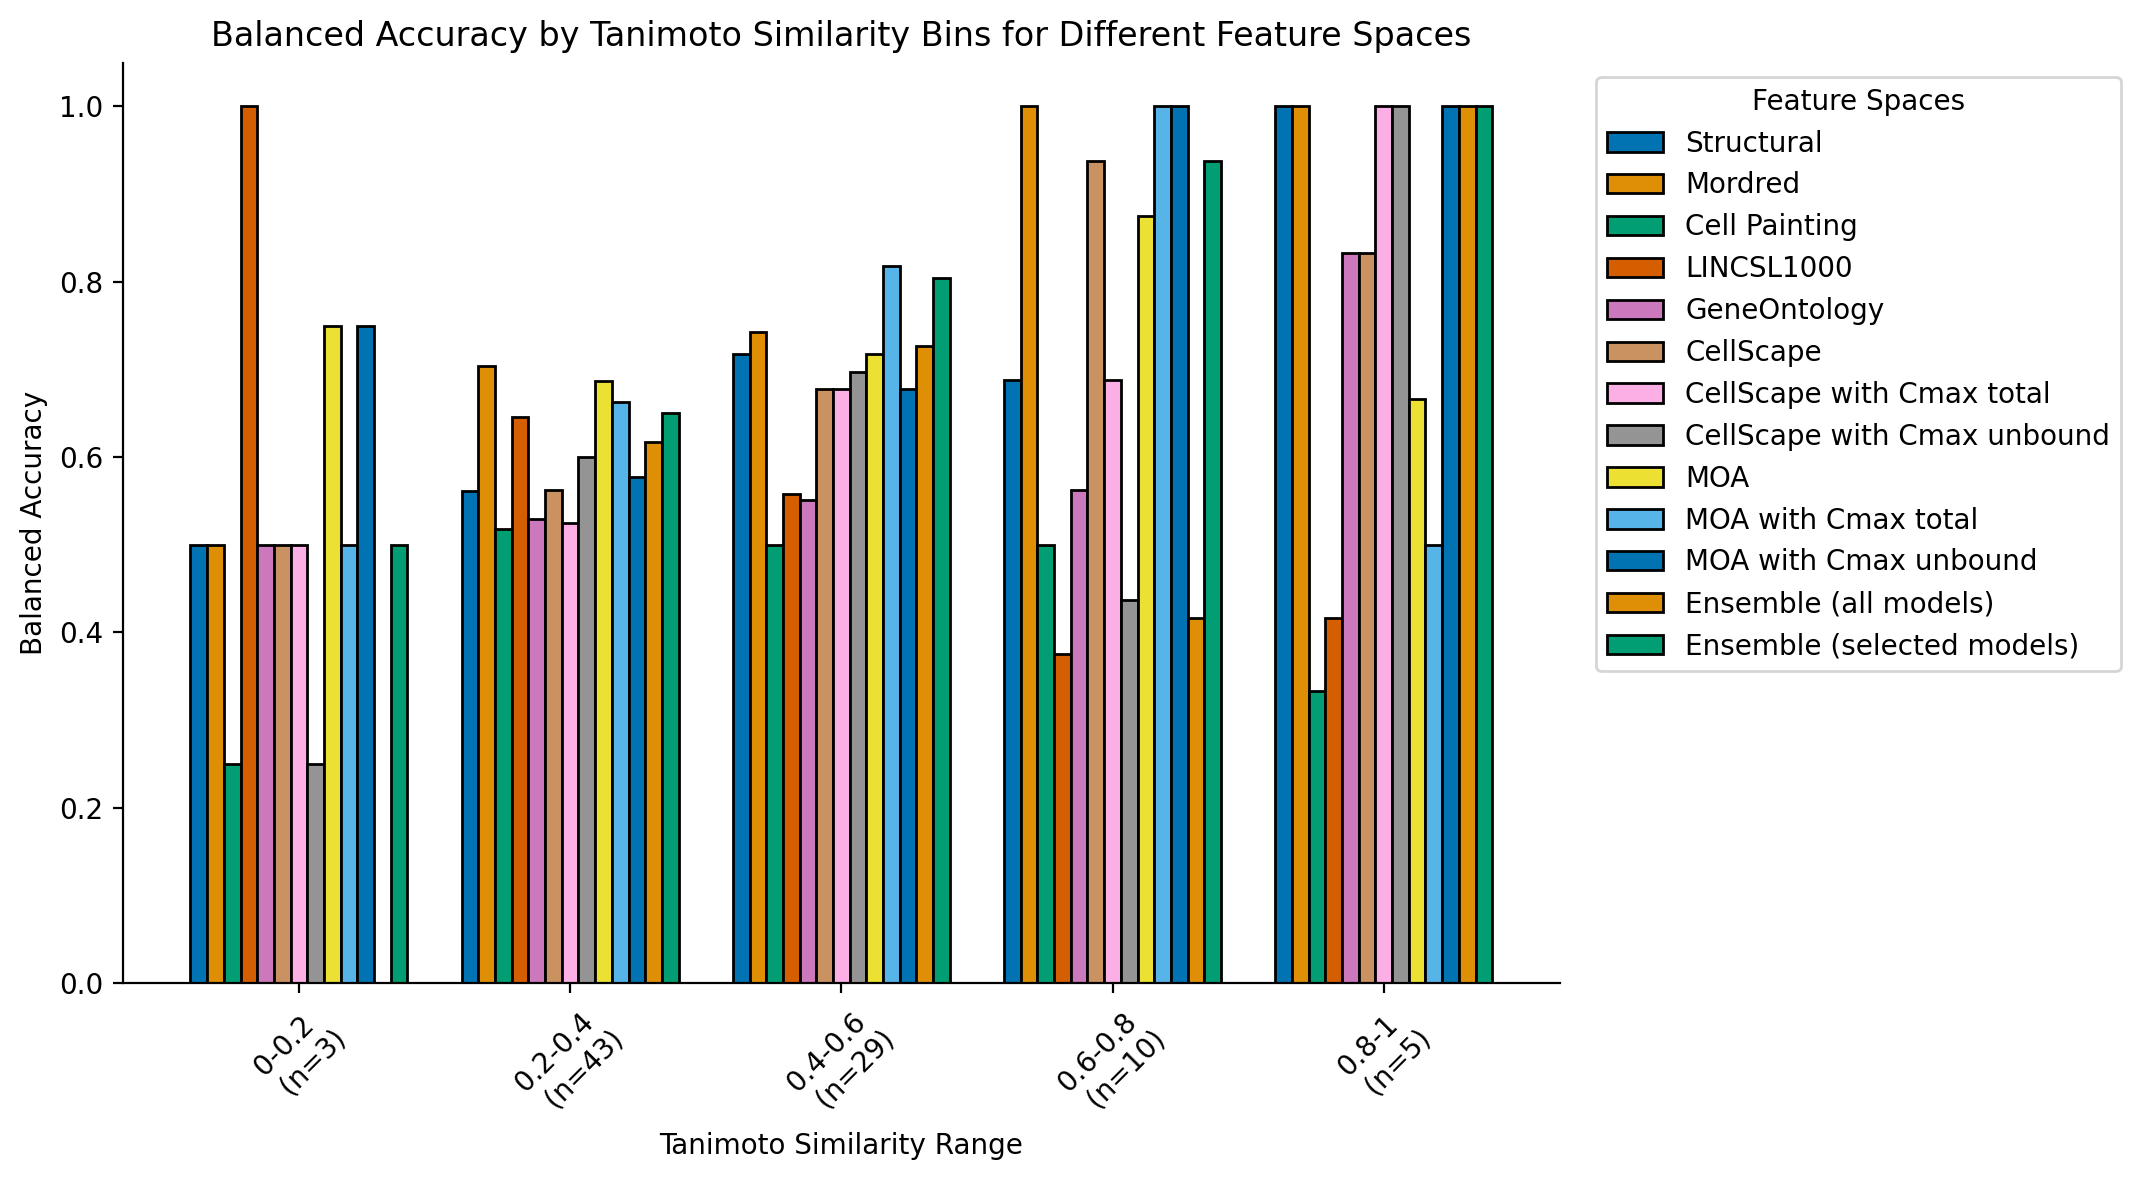

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


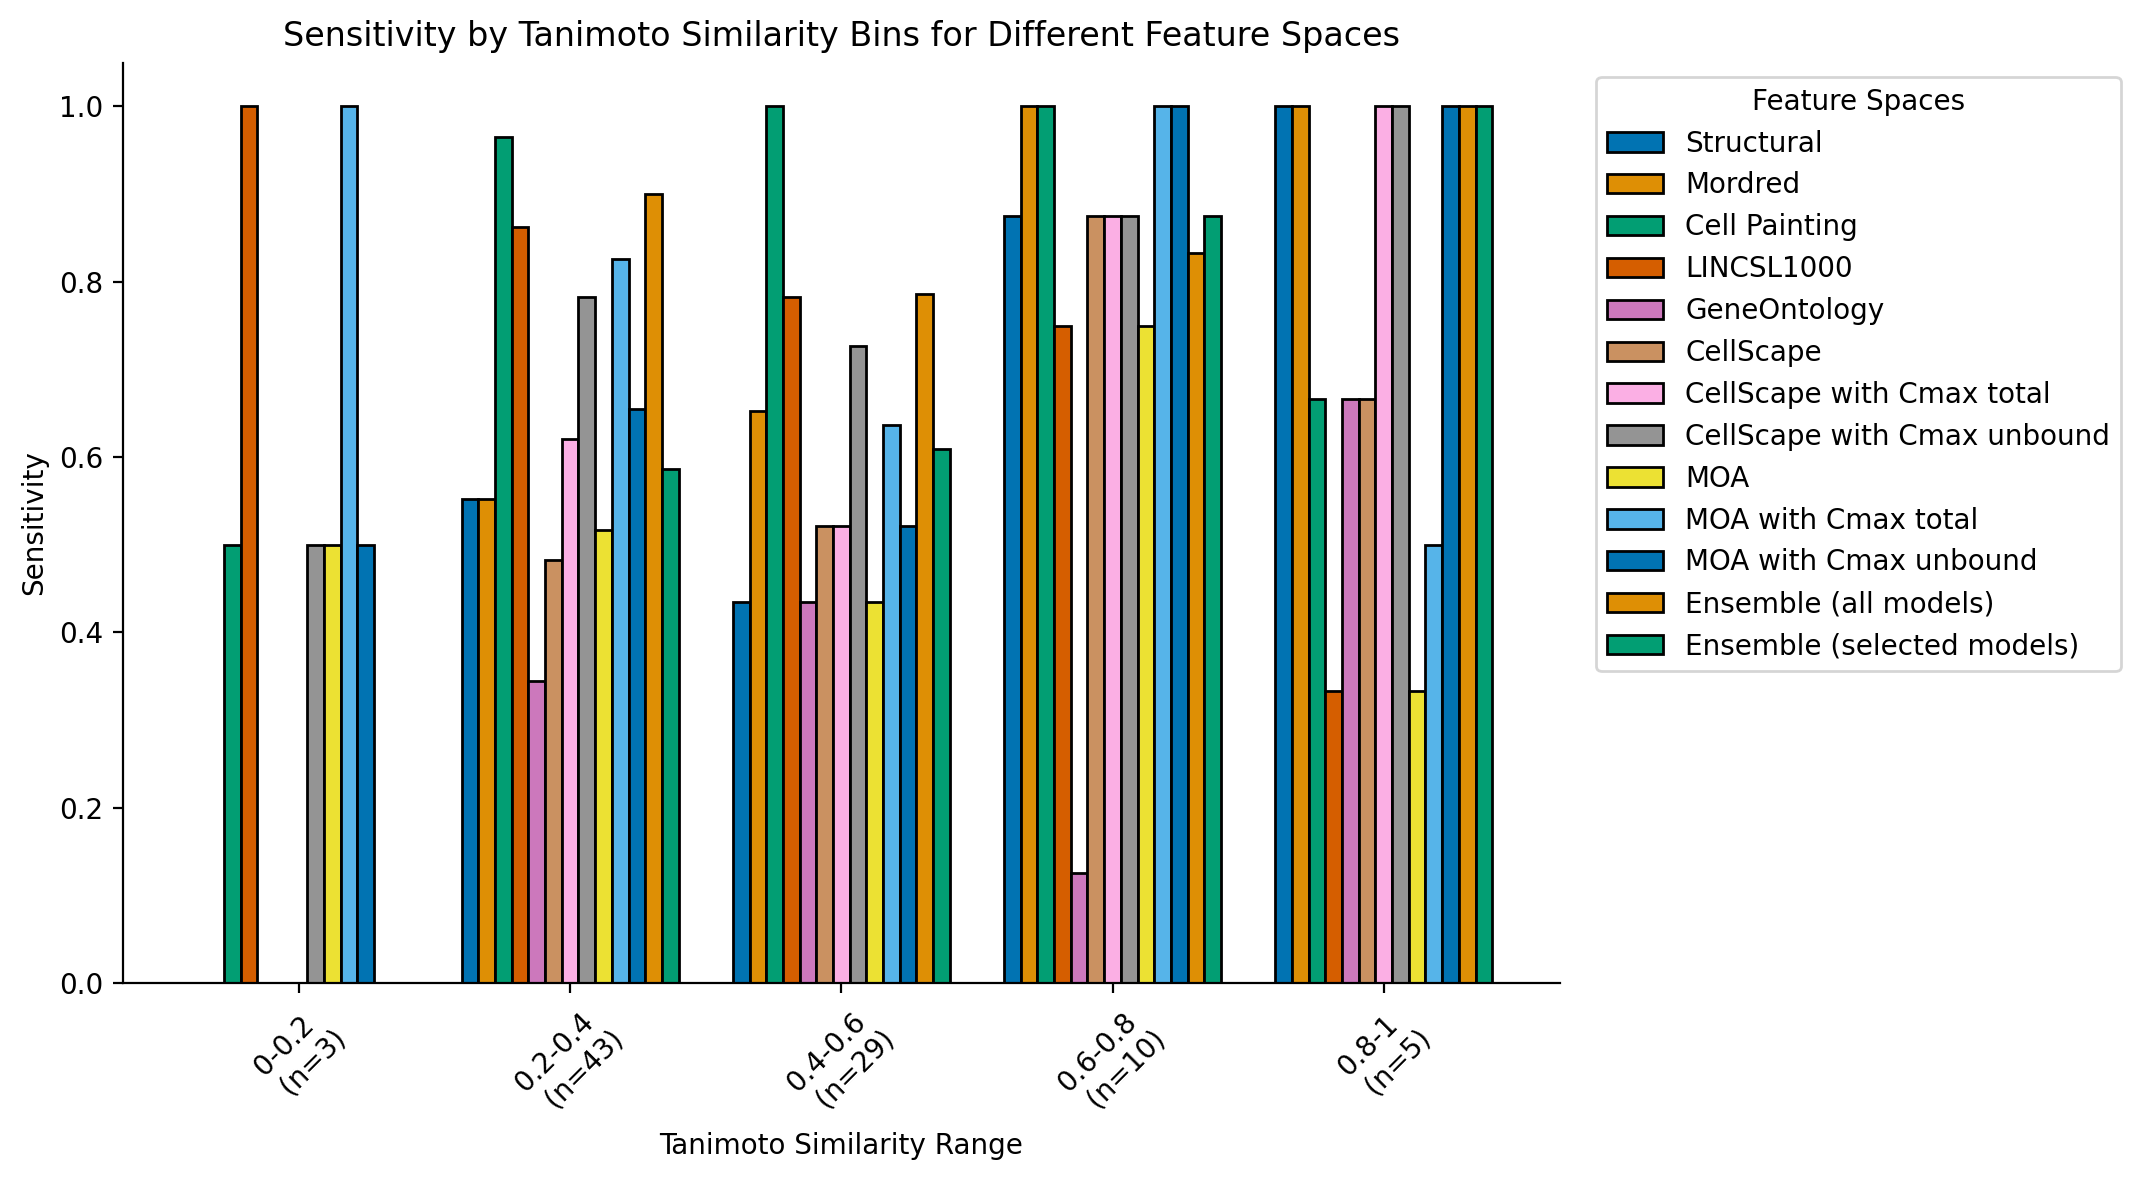

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


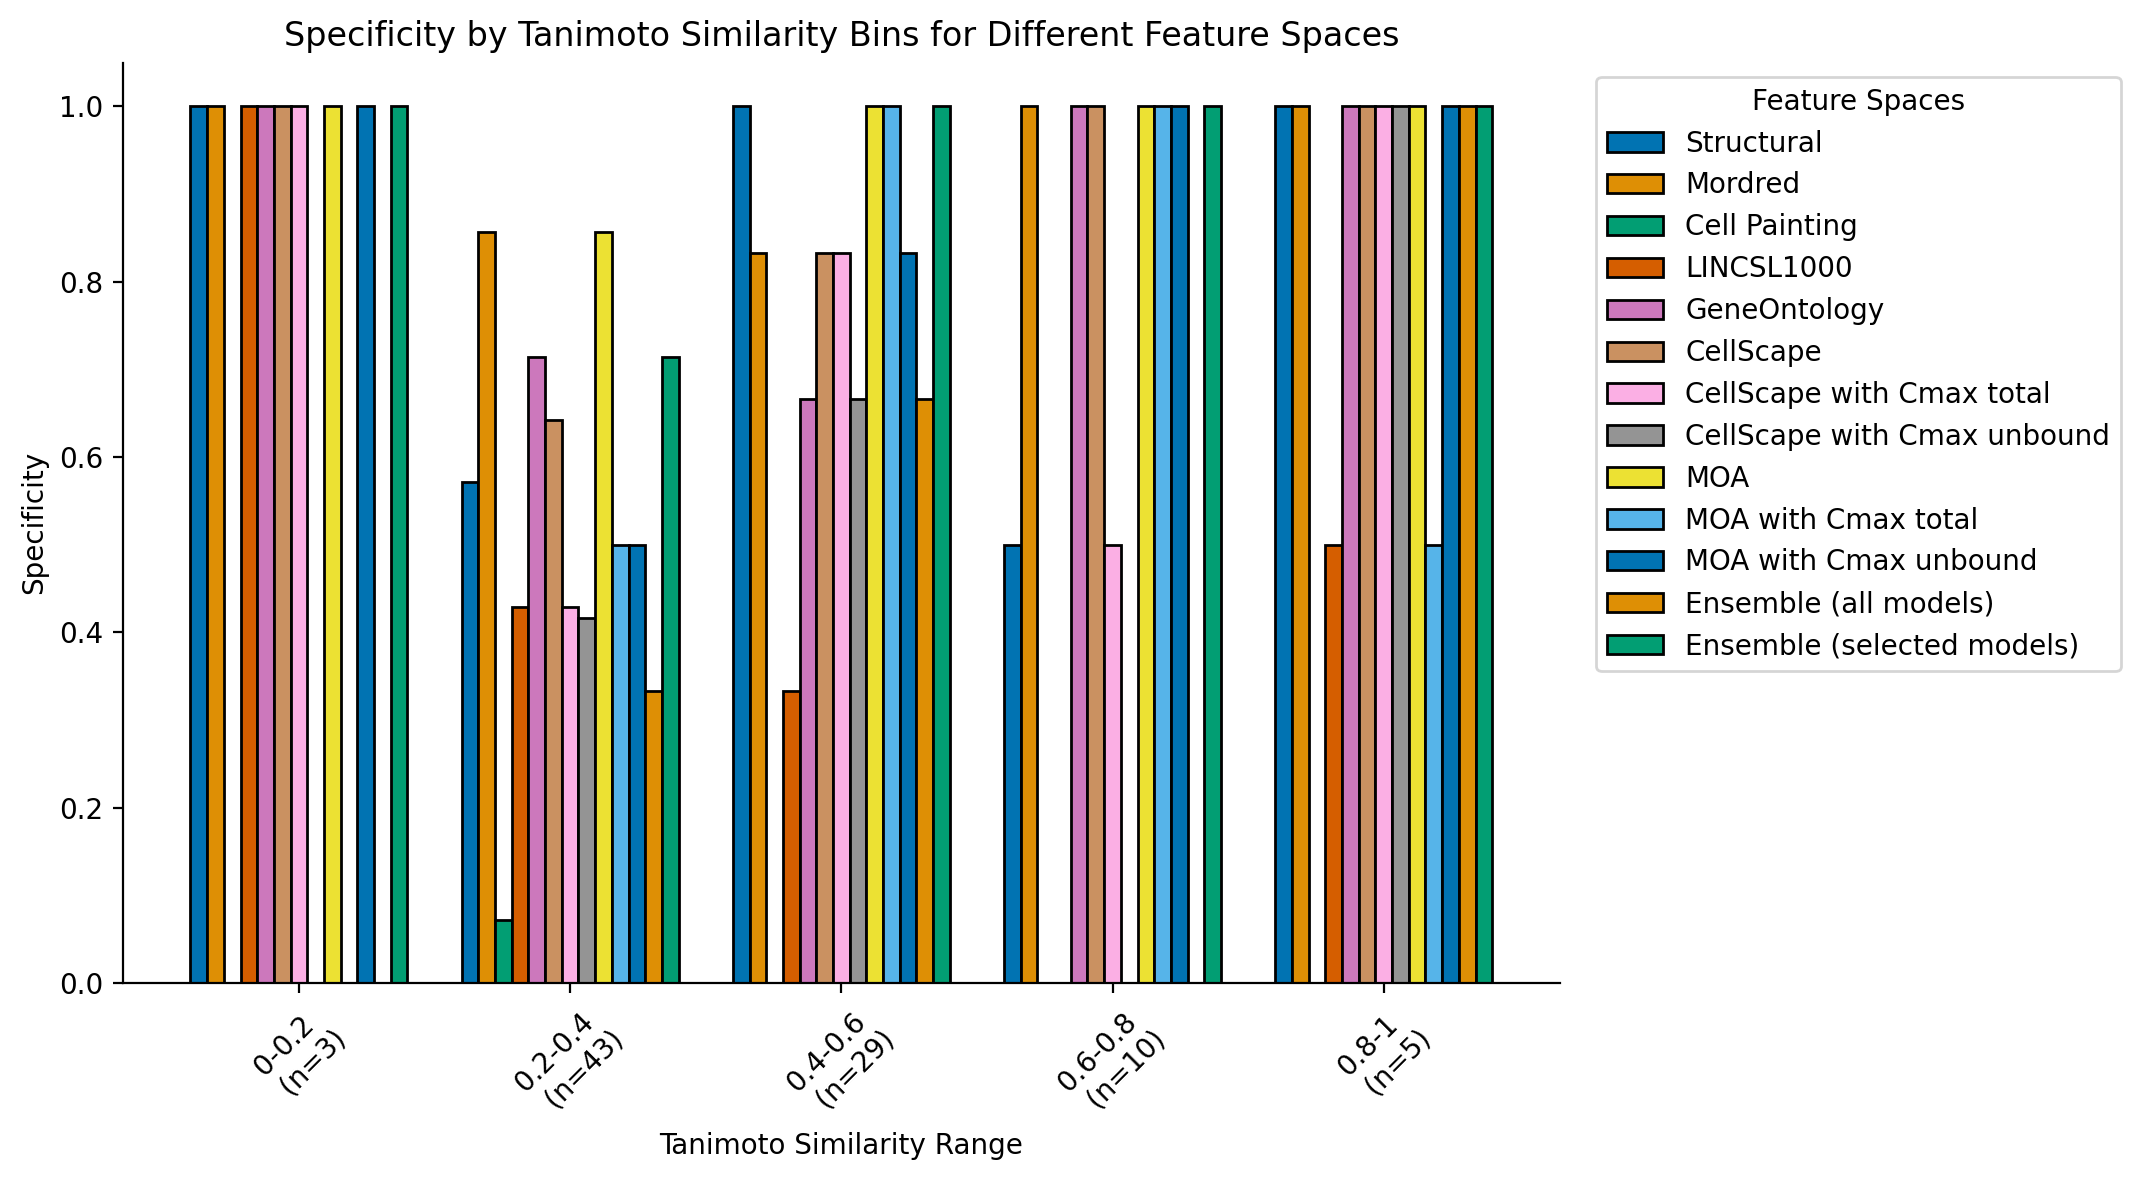

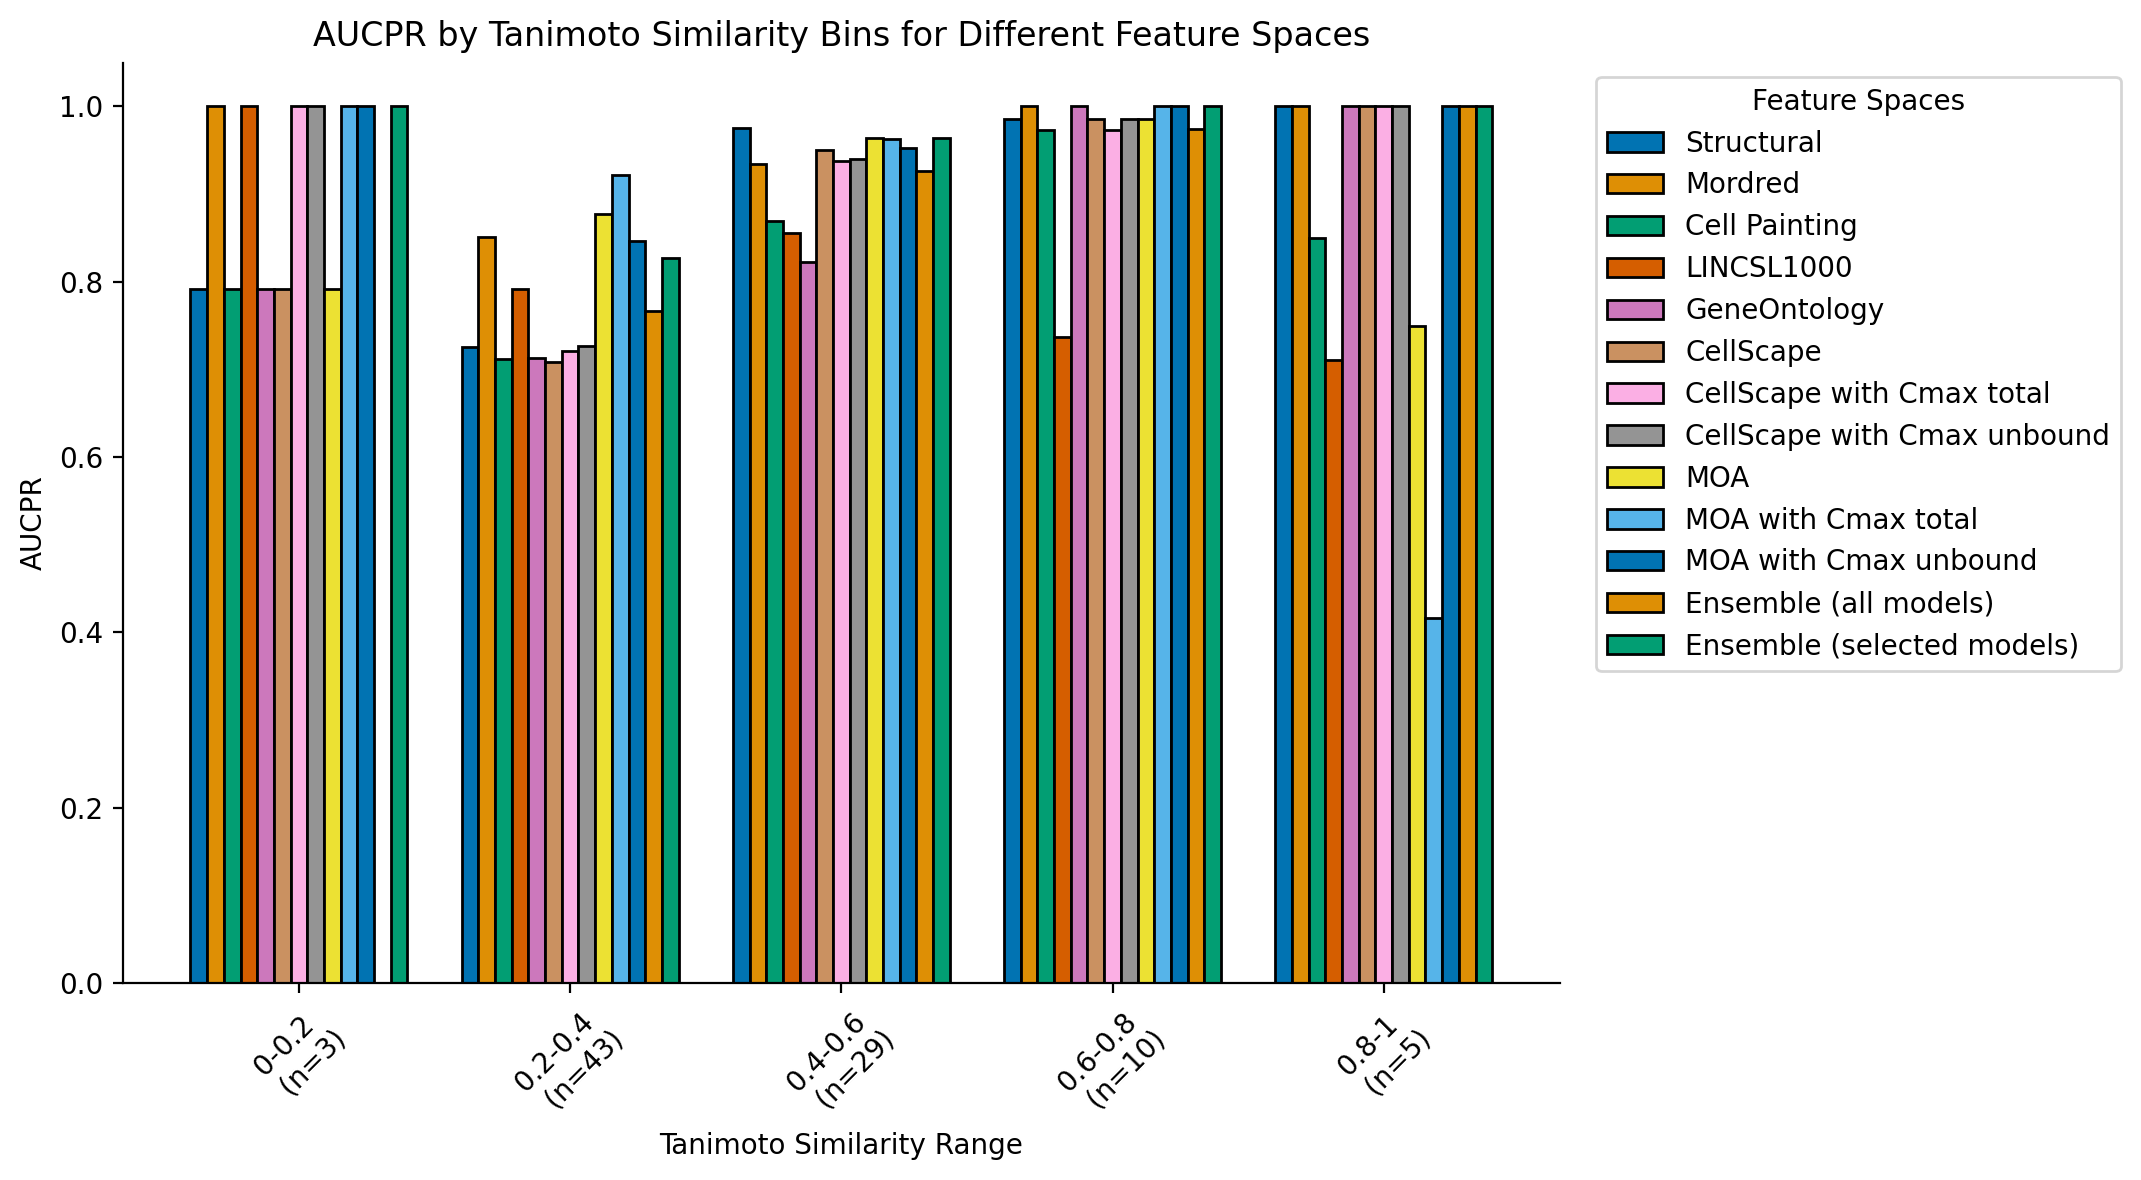

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  LINCSL1000  \
similarity_bin                                                       
0-0.2 \n (n=3)       0.791667  1.000000       0.791667    1.000000   
0.2-0.4 \n (n=43)    0.725984  0.851056       0.712318    0.791890   
0.4-0.6 \n (n=29)    0.975551  0.934651       0.868899    0.856148   
0.6-0.8 \n (n=10)    0.985243  1.000000       0.973611    0.737550   
0.8-1 \n (n=5)       1.000000  1.000000       0.850000    0.711111   

Features           GeneOntology  CellScape  CellScape with Cmax total  \
similarity_bin                                                          
0-0.2 \n (n=3)         0.791667   0.791667                   1.000000   
0.2-0.4 \n (n=43)      0.712546   0.708947                   0.721271   
0.4-0.6 \n (n=29)      0.822047   0.950613                   0

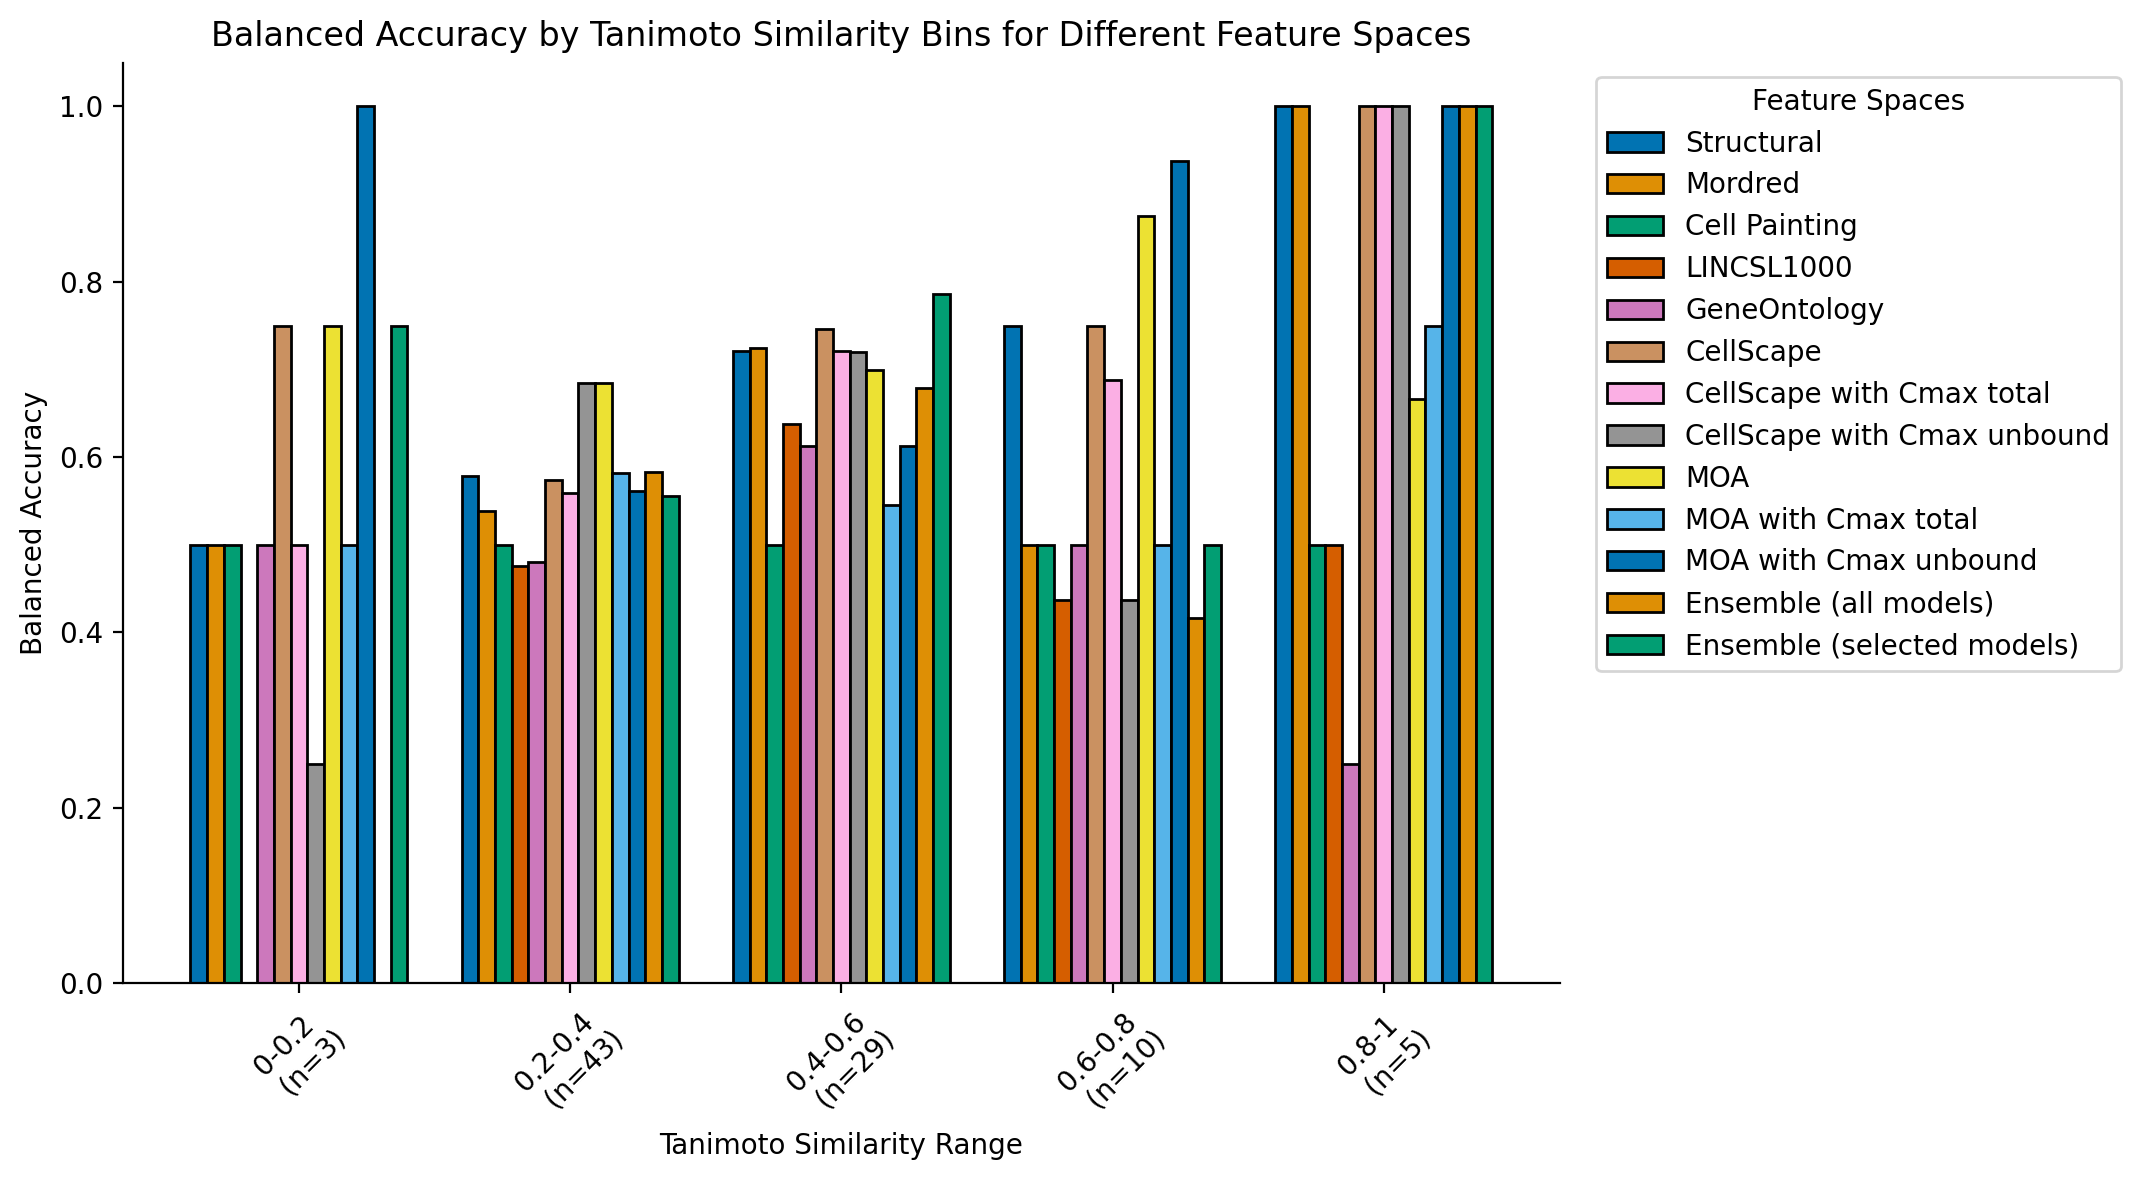

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


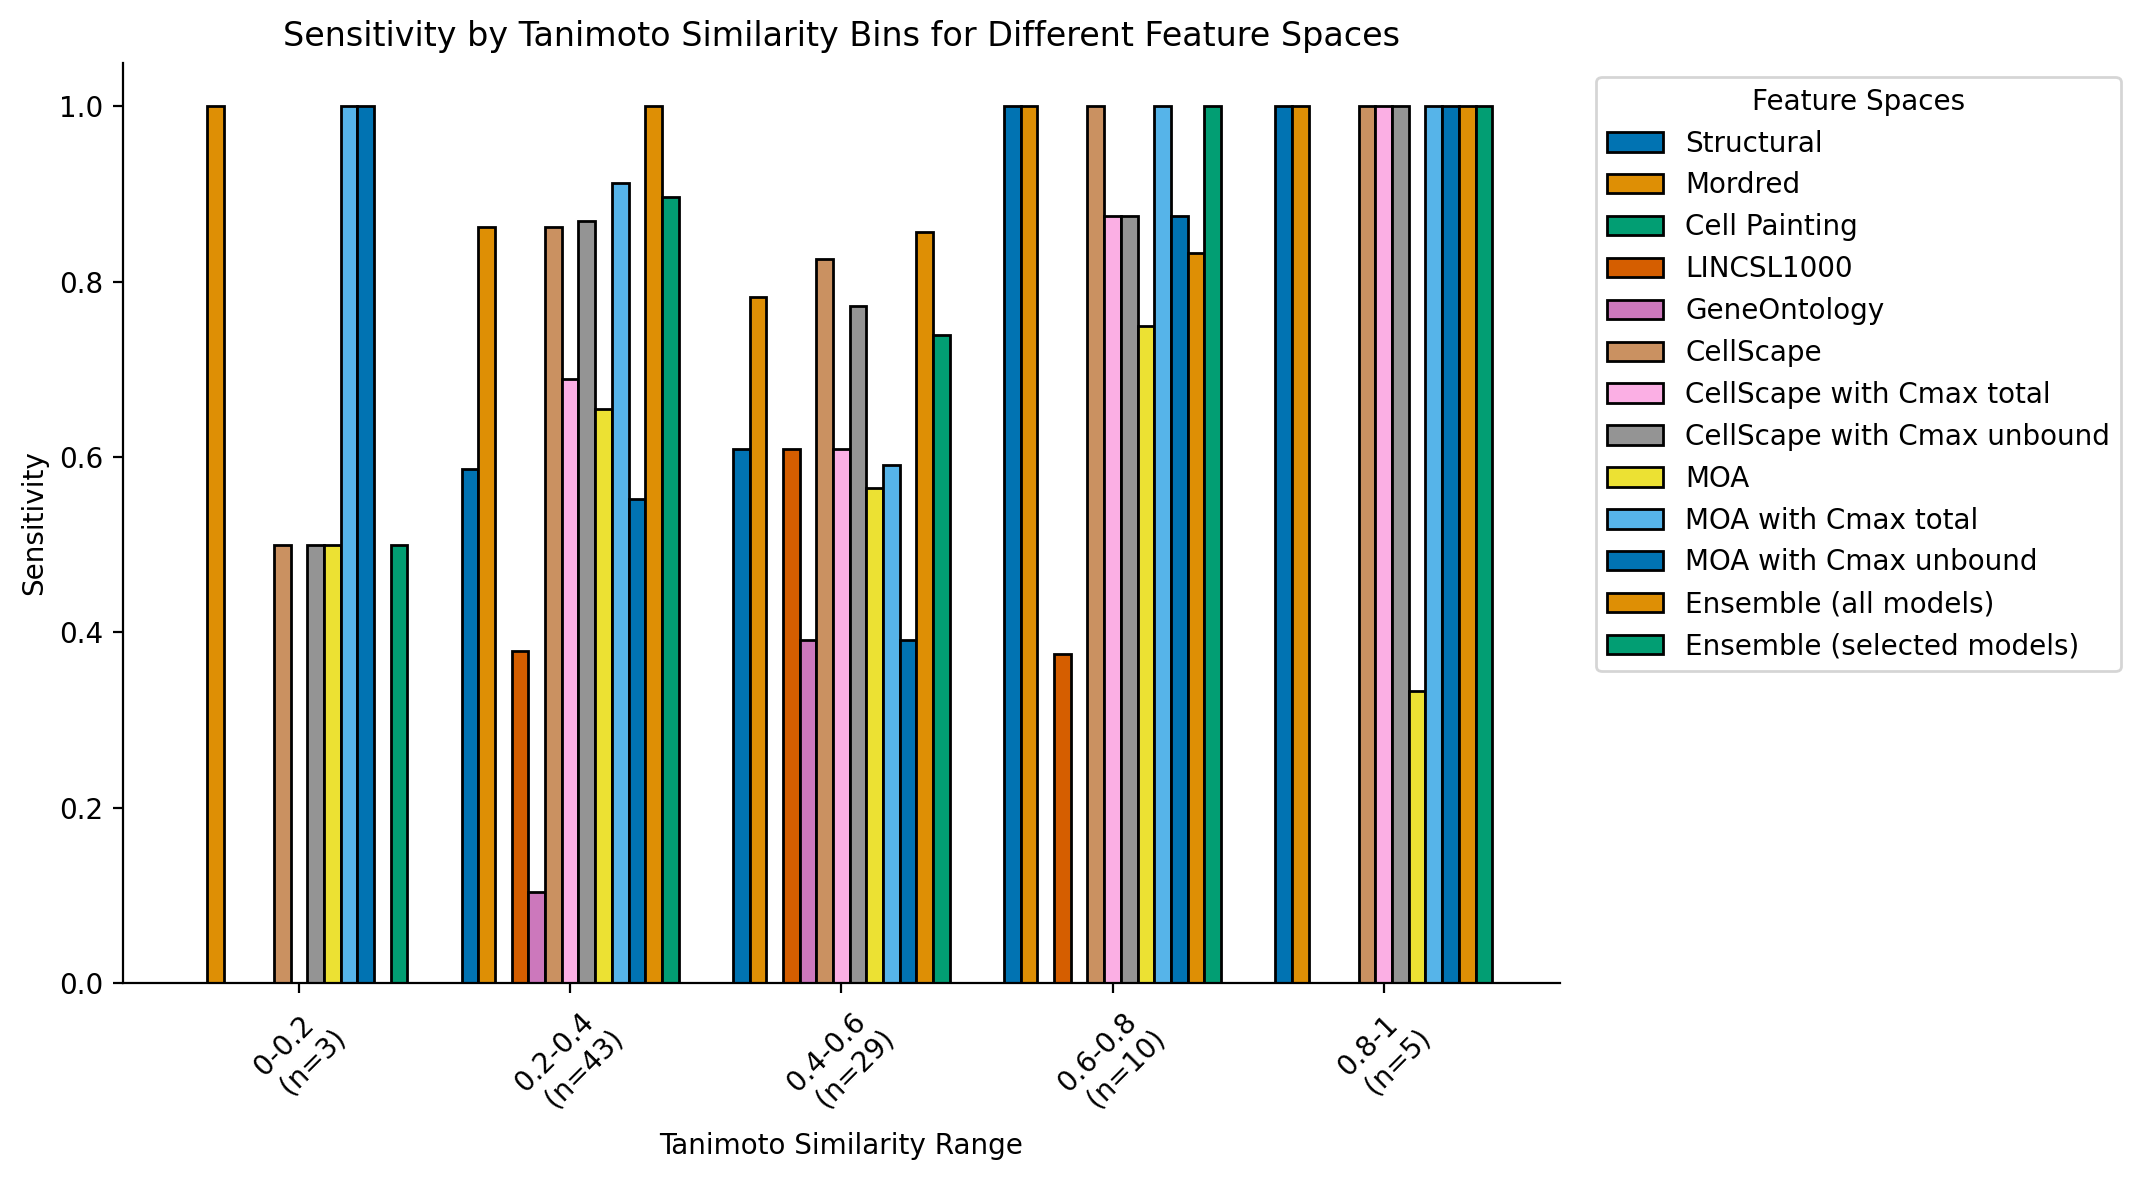

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


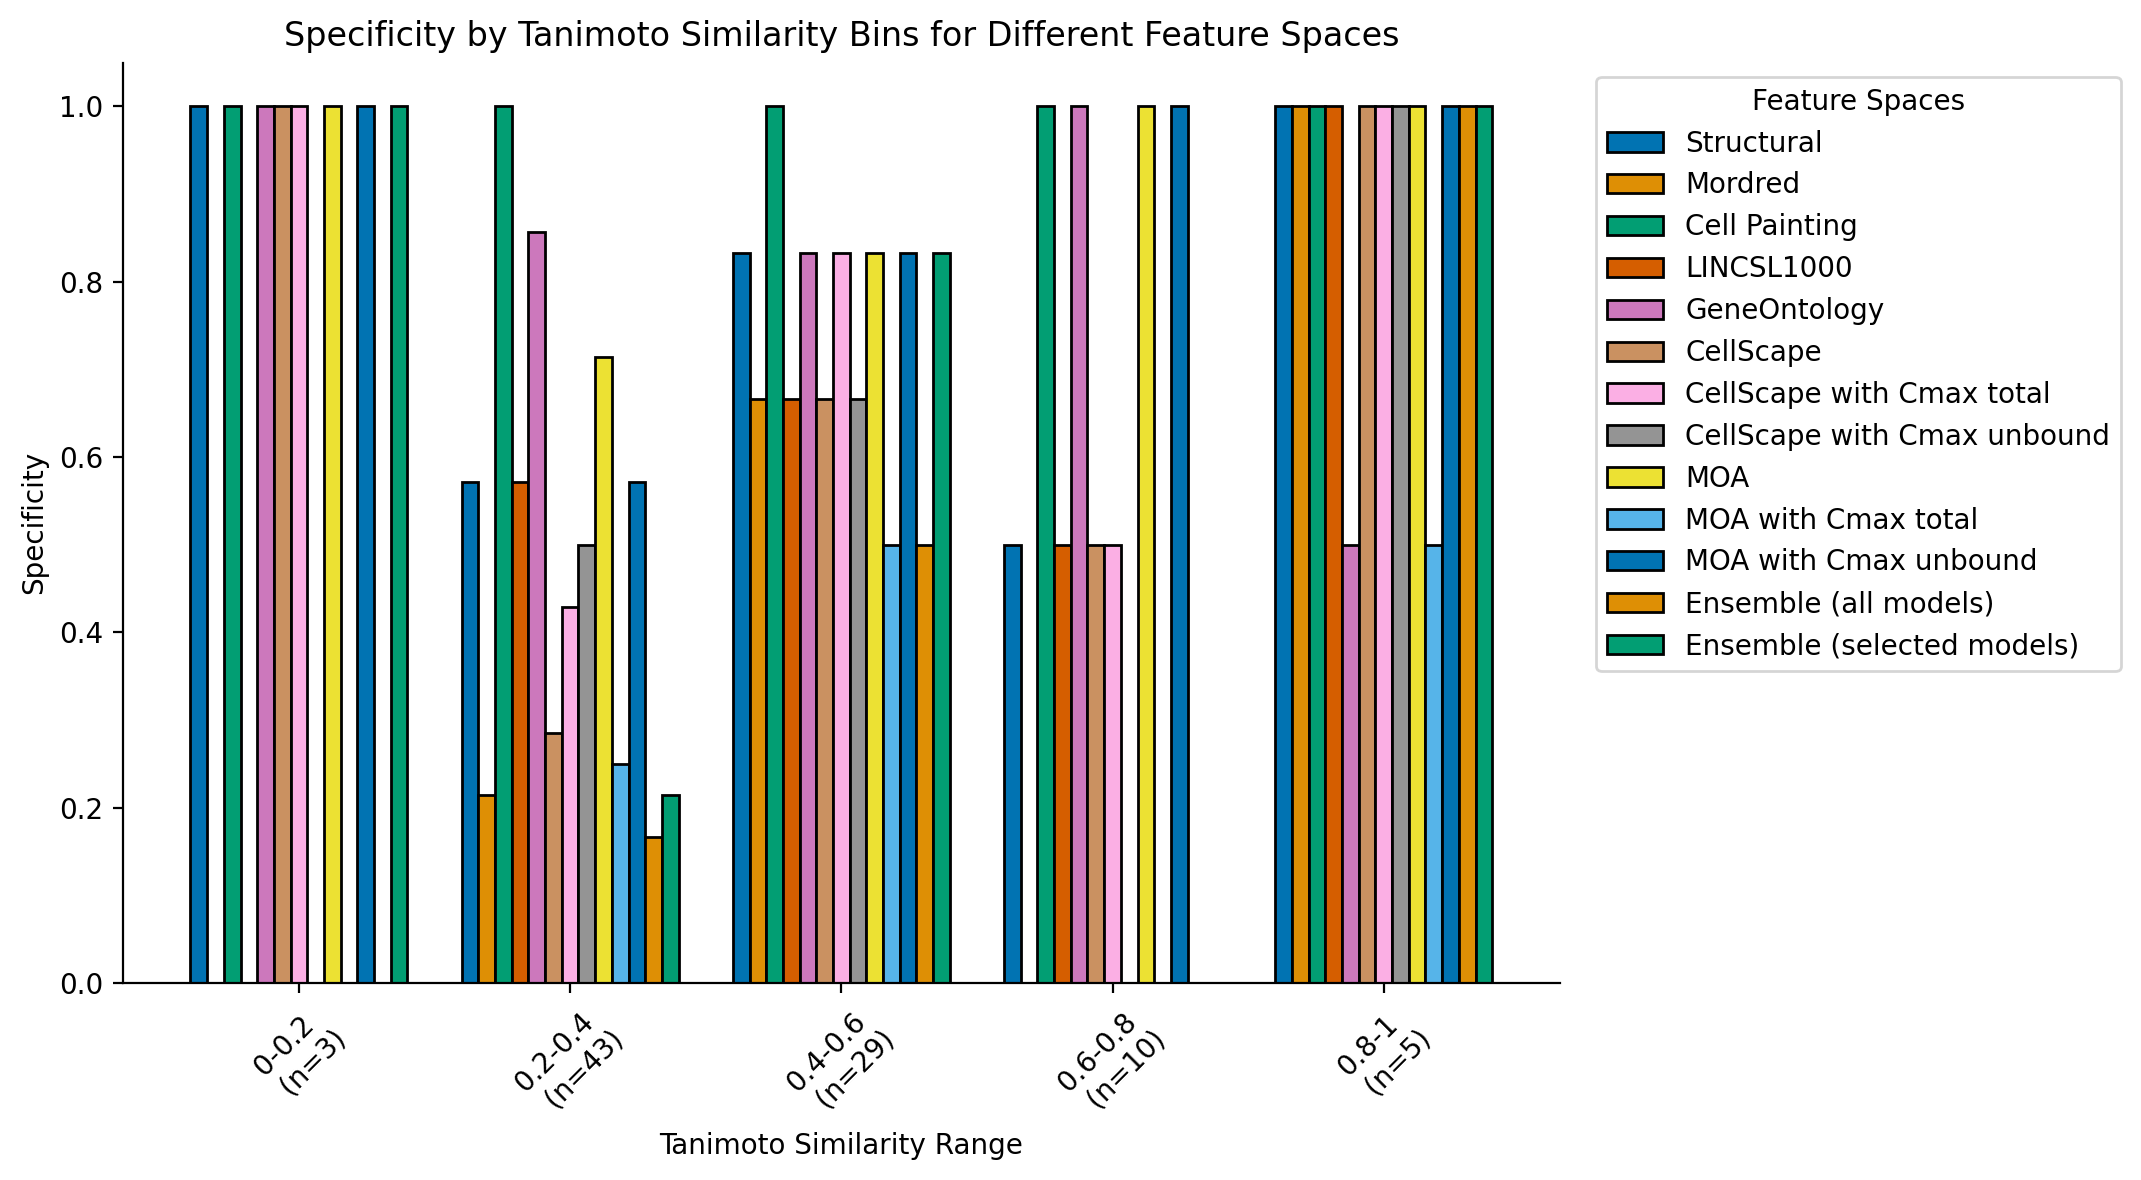

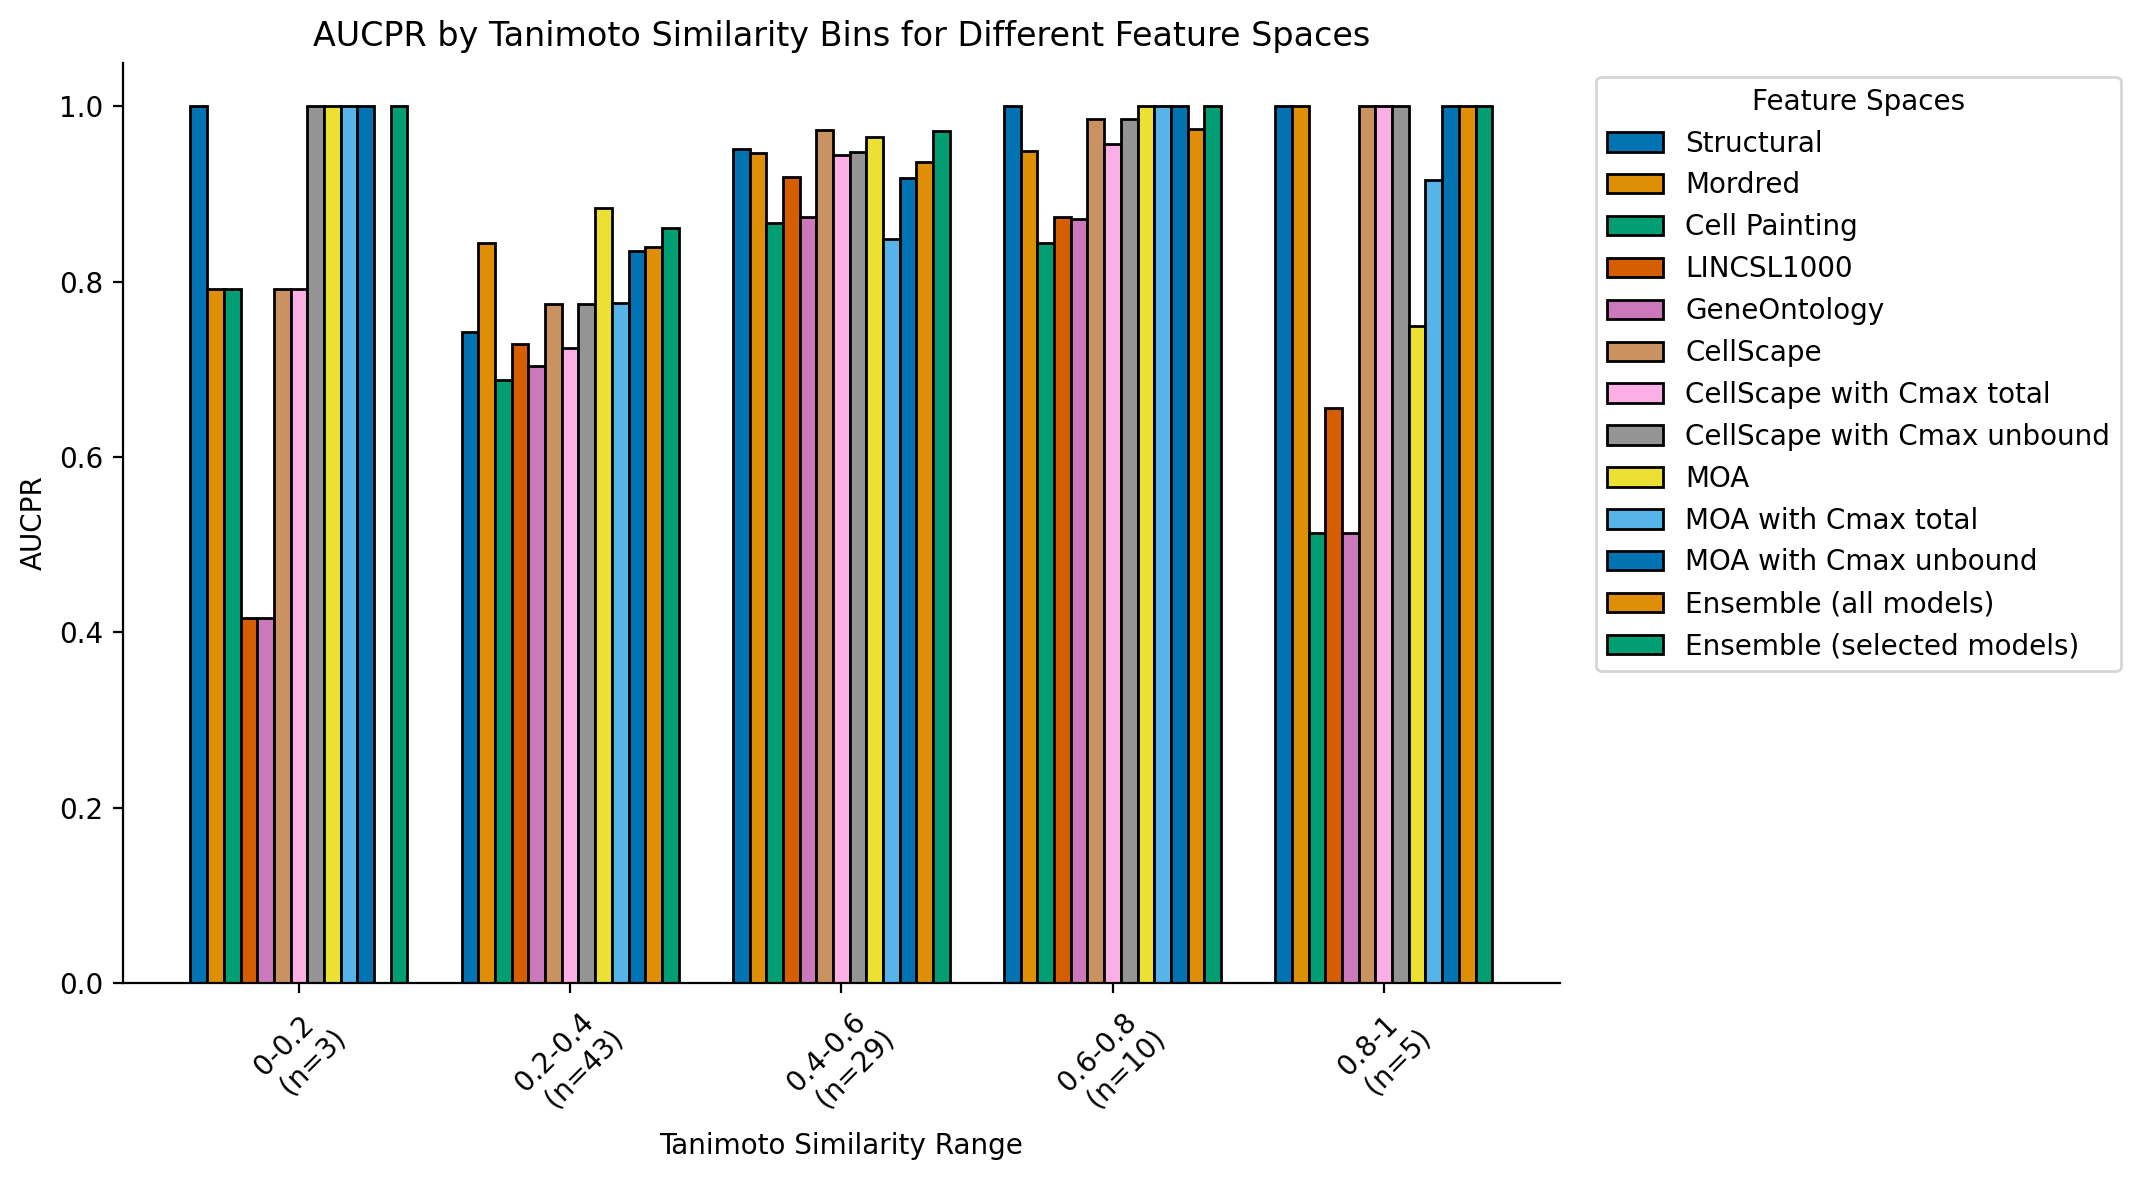

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  LINCSL1000  \
similarity_bin                                                       
0-0.2 \n (n=3)       1.000000  0.791667       0.791667    0.416667   
0.2-0.4 \n (n=43)    0.742471  0.844369       0.688098    0.729219   
0.4-0.6 \n (n=29)    0.951344  0.947051       0.866725    0.919784   
0.6-0.8 \n (n=10)    1.000000  0.949157       0.843800    0.873710   
0.8-1 \n (n=5)       1.000000  1.000000       0.513889    0.655556   

Features           GeneOntology  CellScape  CellScape with Cmax total  \
similarity_bin                                                          
0-0.2 \n (n=3)         0.416667   0.791667                   0.791667   
0.2-0.4 \n (n=43)      0.704373   0.775050                   0.724607   
0.4-0.6 \n (n=29)      0.873699   0.973126                   0

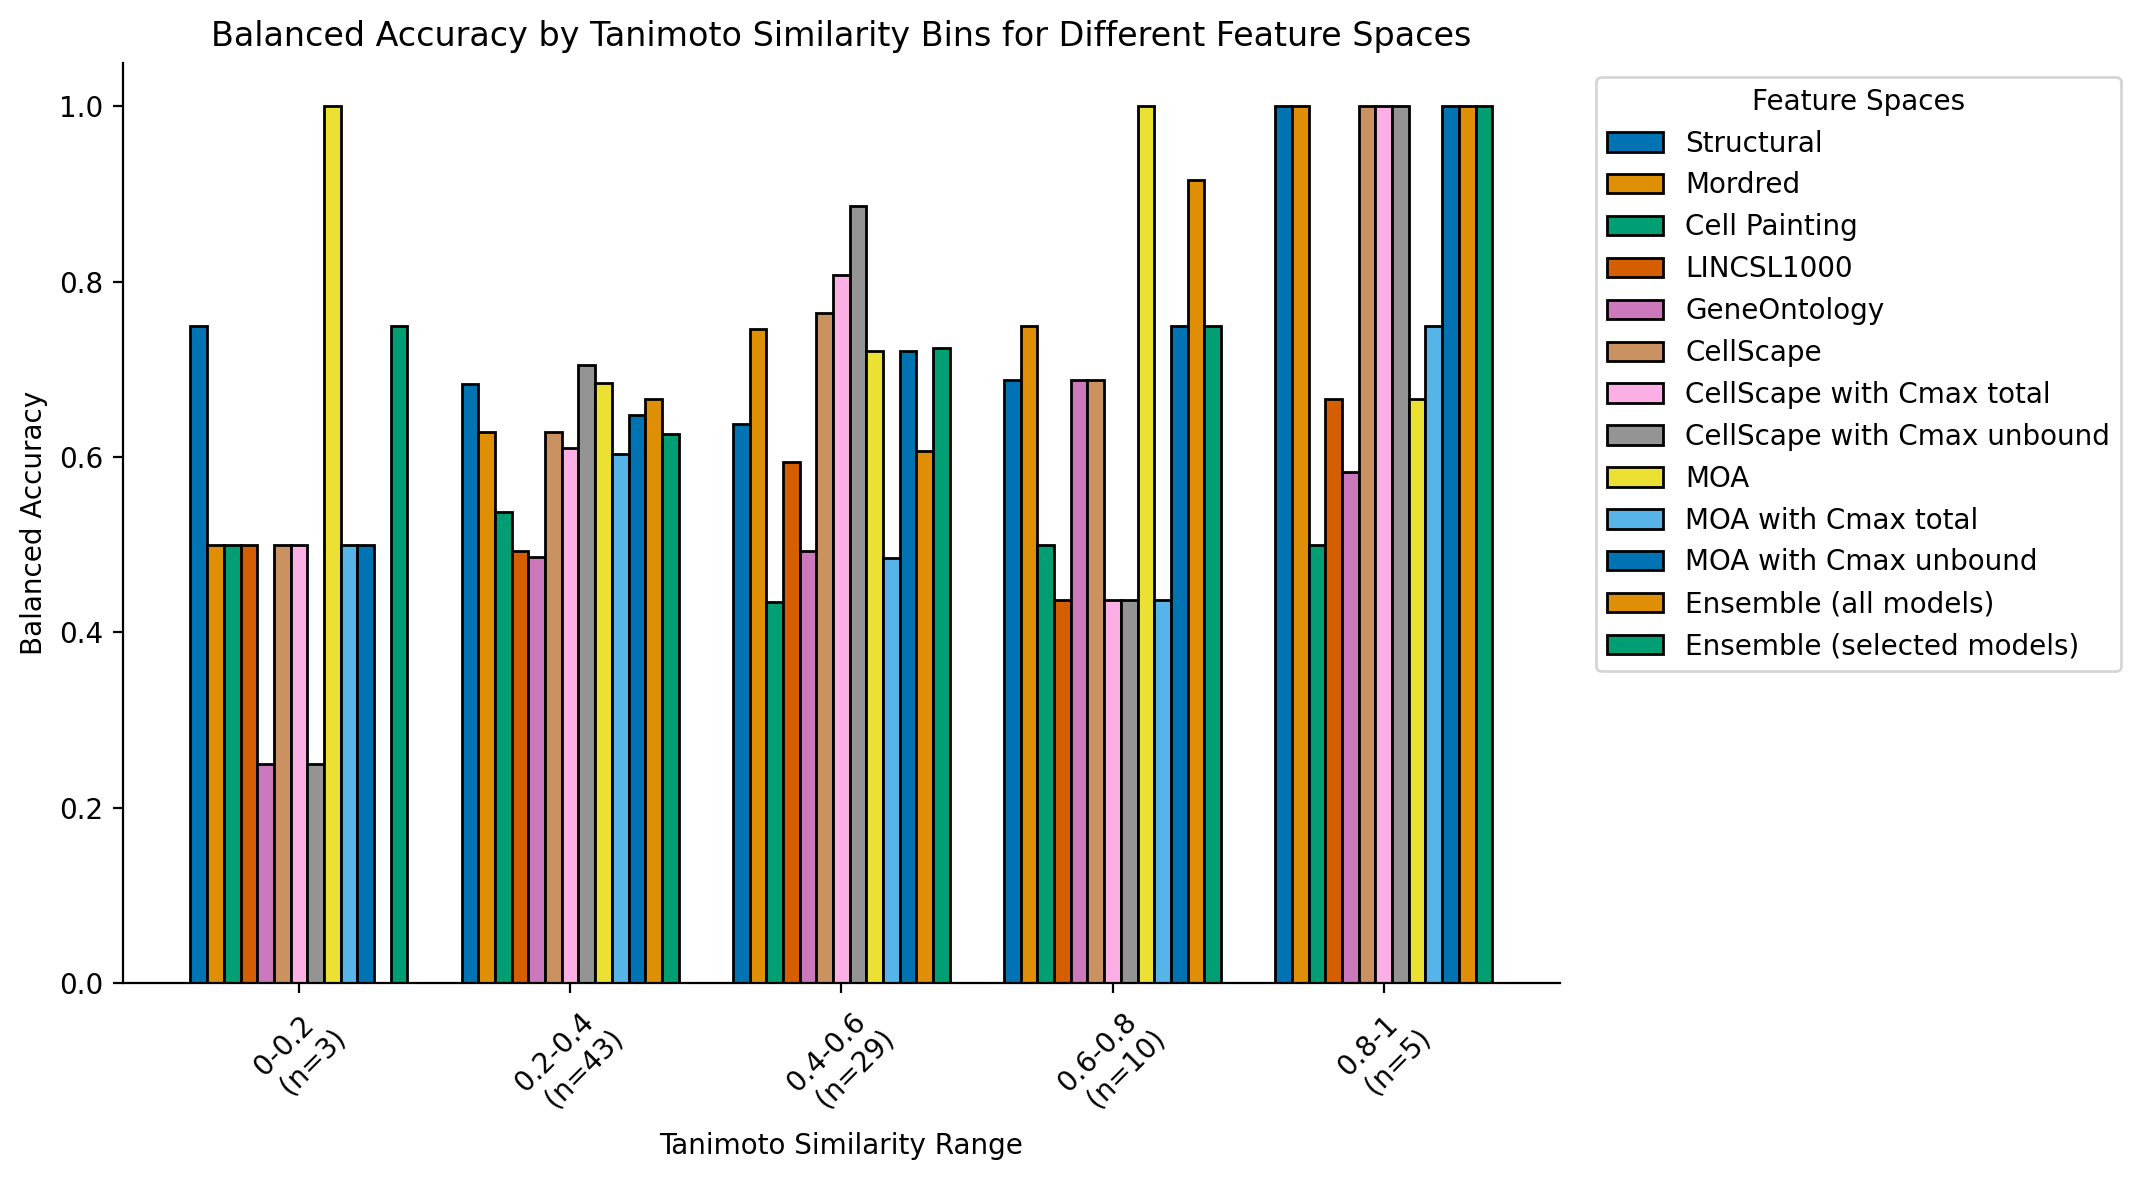

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


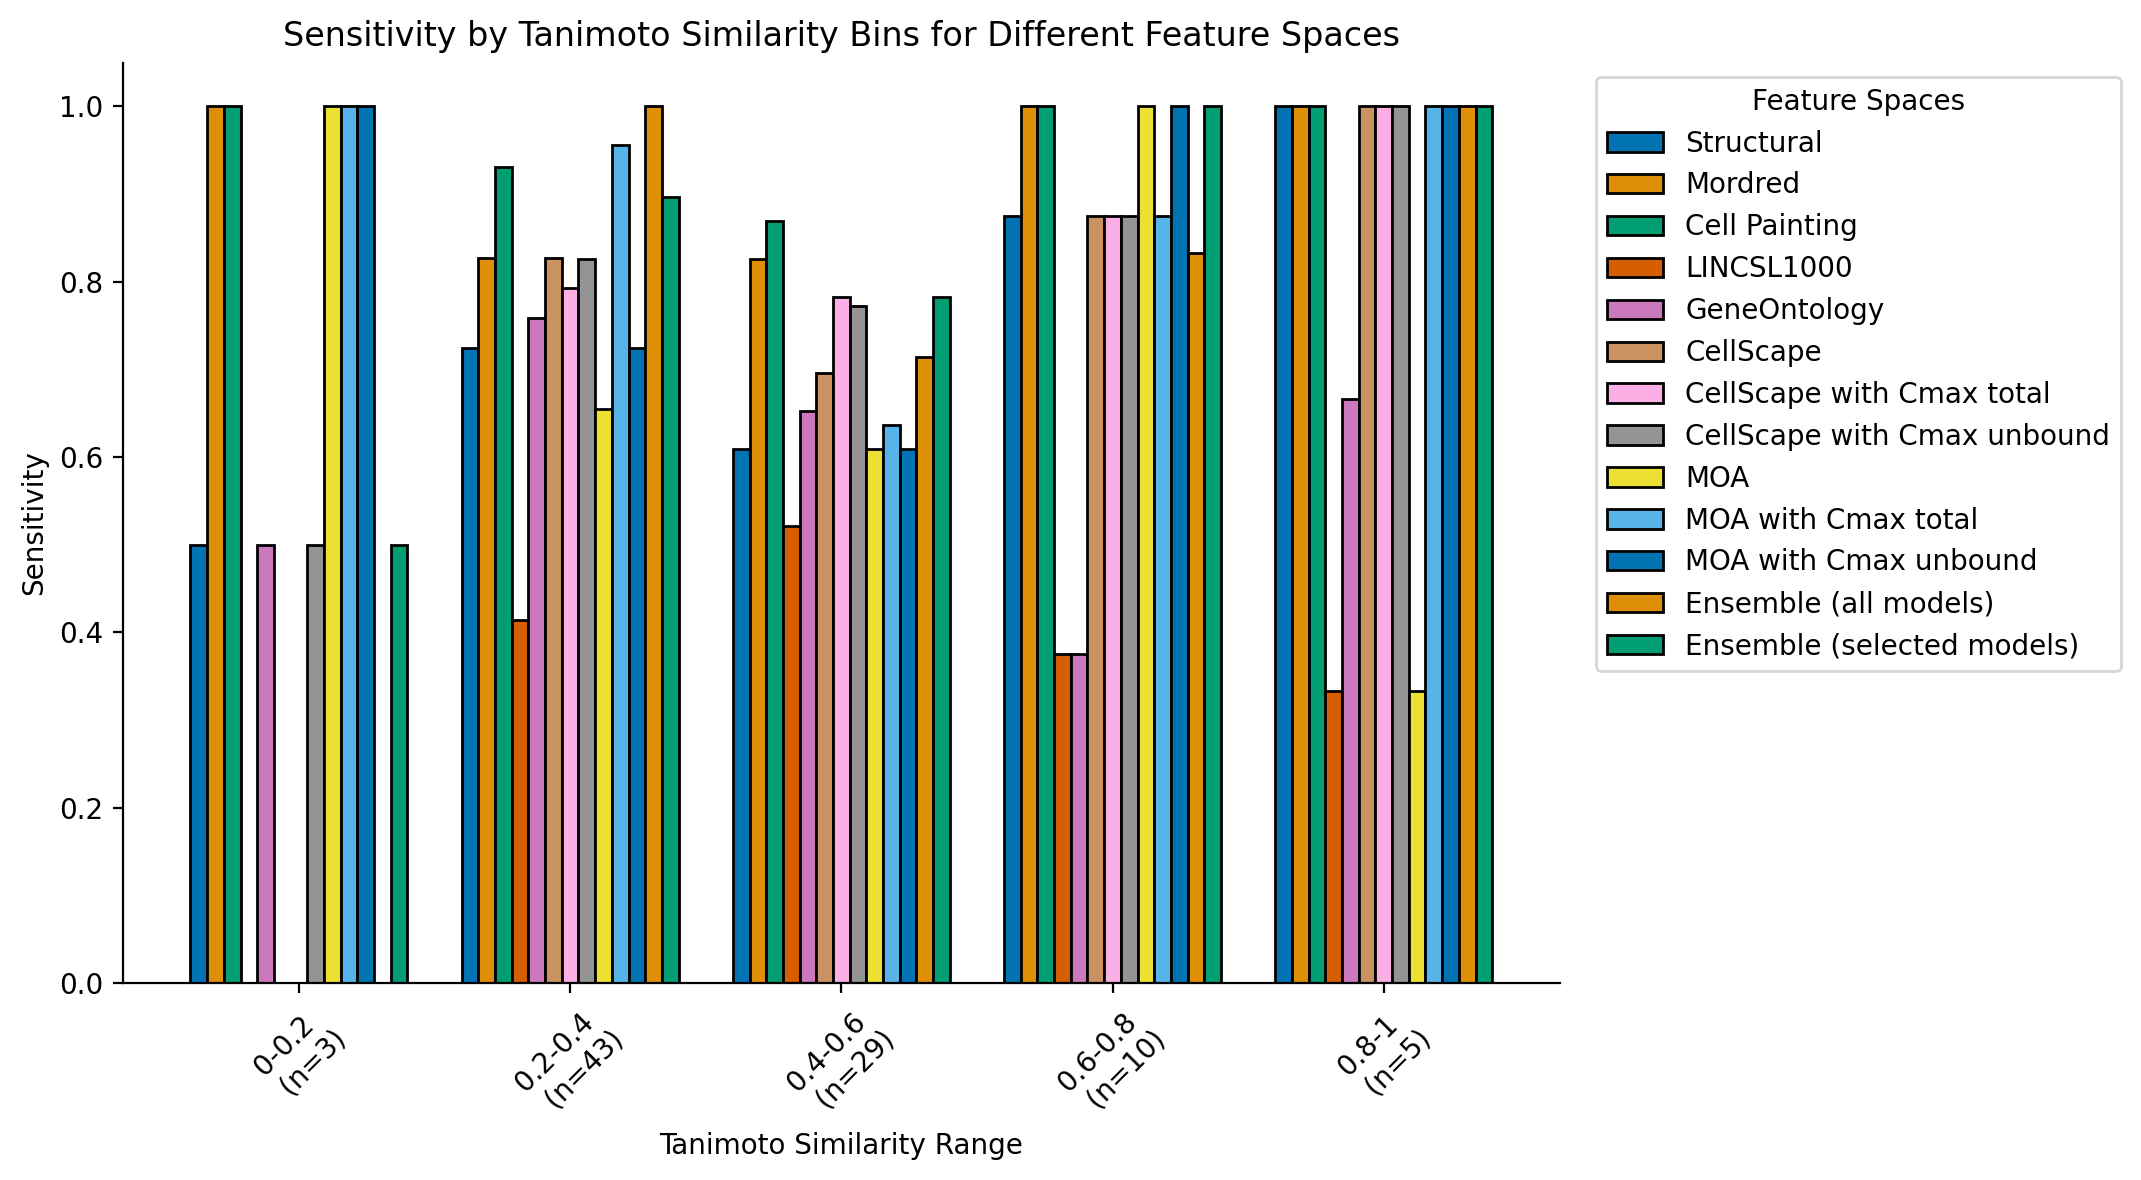

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64


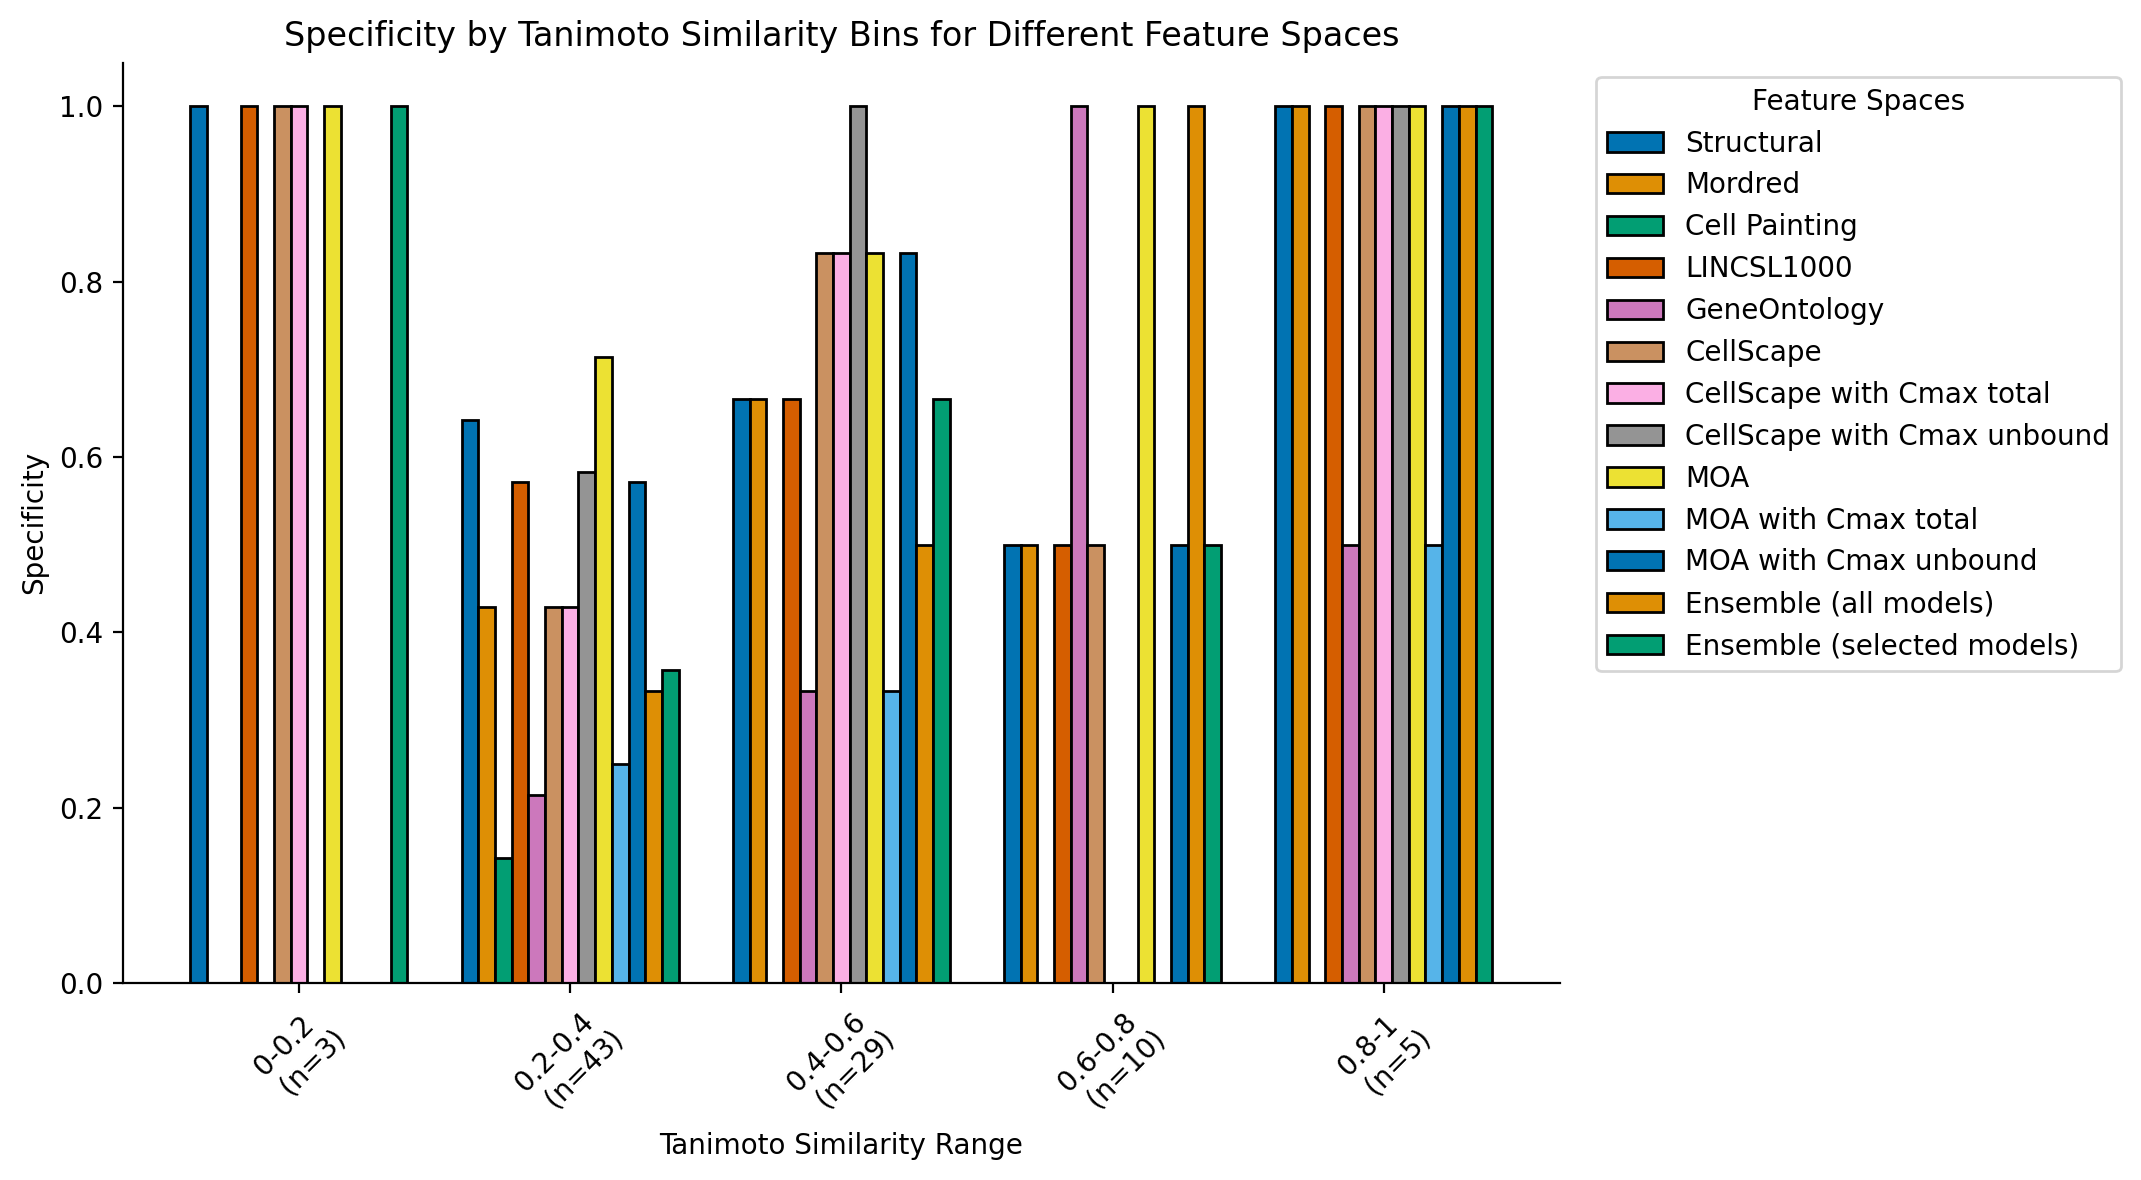

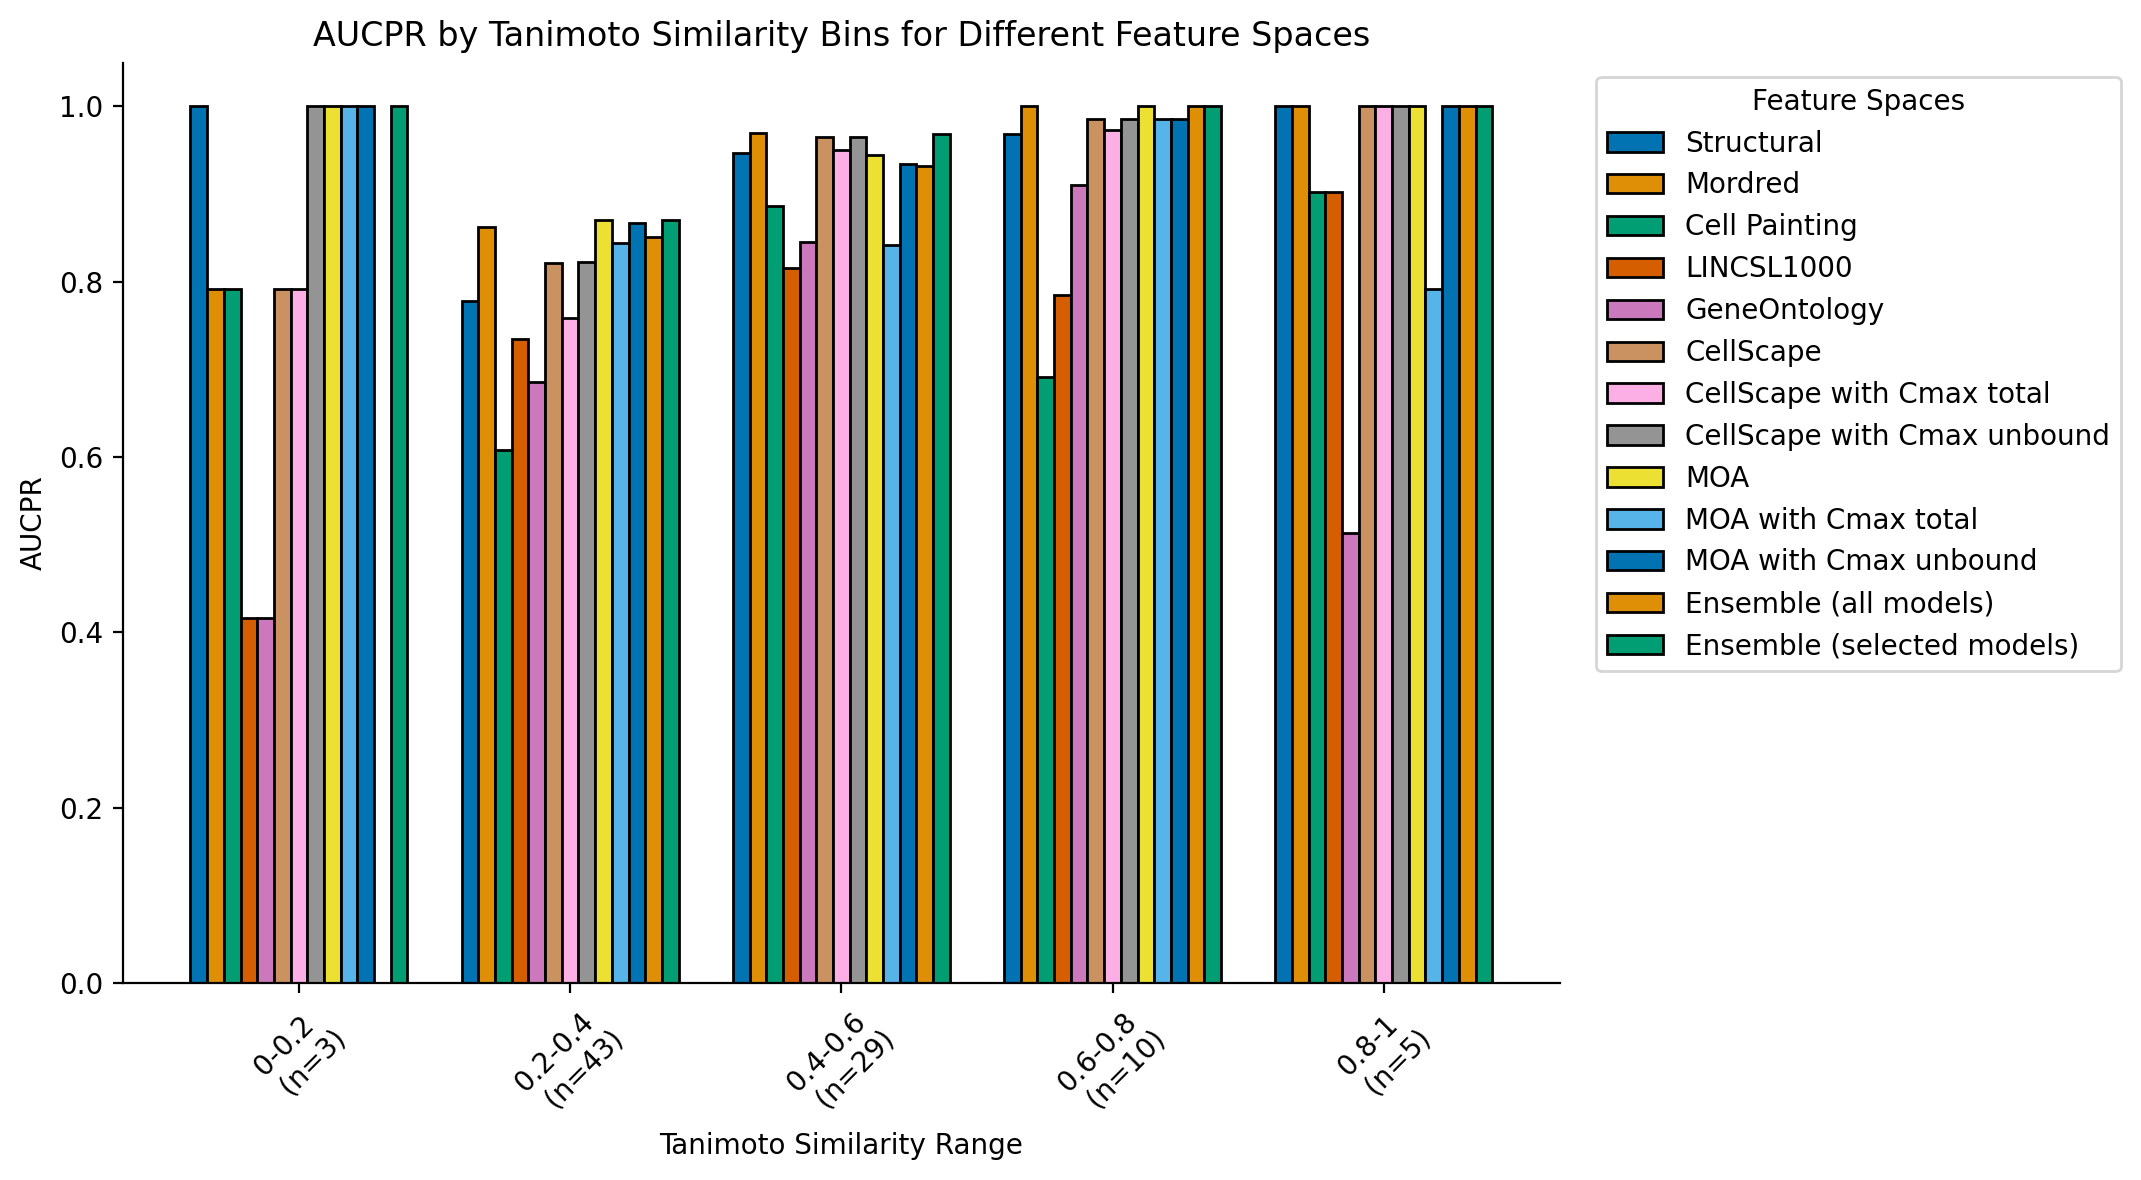

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  LINCSL1000  \
similarity_bin                                                       
0-0.2 \n (n=3)       1.000000  0.791667       0.791667    0.416667   
0.2-0.4 \n (n=43)    0.777774  0.862164       0.607519    0.735119   
0.4-0.6 \n (n=29)    0.947471  0.969427       0.886256    0.815227   
0.6-0.8 \n (n=10)    0.968502  1.000000       0.691419    0.785169   
0.8-1 \n (n=5)       1.000000  1.000000       0.902778    0.902778   

Features           GeneOntology  CellScape  CellScape with Cmax total  \
similarity_bin                                                          
0-0.2 \n (n=3)         0.416667   0.791667                   0.791667   
0.2-0.4 \n (n=43)      0.685213   0.821413                   0.758919   
0.4-0.6 \n (n=29)      0.845842   0.965737                   0

In [17]:
import seaborn as sns

feature_order = ["Structural",
                "Mordred",
                "Cell Painting",
                "LINCSL1000",
                "GeneOntology",
                "CellScape",
                "CellScape with Cmax total",
                 "CellScape with Cmax unbound",
                "MOA",
                "MOA with Cmax unbound",
                "MOA with Cmax total",
                 "Ensemble (all models)", 
                 "Ensemble (selected models)"] # order


legend_text = ["Structural", 
               "Mordred",  
               "Cell Painting", 
               "LINCSL1000", 
               "GeneOntology",
               "CellScape",
               "CellScape with Cmax total",
               "CellScape with Cmax unbound",
               "MOA", "MOA with Cmax total", 
               "MOA with Cmax unbound",
               "Ensemble (all models)", 
               "Ensemble (selected models)"]

color_palette = sns.color_palette("colorblind", len(feature_order))

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
bin_labels = ['0-0.2 \n (n=3)', '0.2-0.4 \n (n=43)', '0.4-0.6 \n (n=29)',
              '0.6-0.8 \n (n=10)', '0.8-1 \n (n=5)']


for dataset in ['cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    
    print(dataset)
    dataset_results = allresults[allresults["Dataset"] == dataset]
    print(dataset_results.SMILES.nunique())
    
    dataset_results = pd.merge(dataset_results, test_df_similarity_nn, left_on="SMILES", right_on="Standardized_SMILES")
    # Create bins for the Mean_Tanimoto_Similarity values

    dataset_results['similarity_bin'] = pd.cut(dataset_results['Mean_Tanimoto_Similarity'], bins=bin_edges, labels=bin_labels, right=False)


    # Group by `similarity_bin` and `Features` and compute balanced accuracy
    balanced_accuracy_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(balanced_accuracy).reset_index()

    # Pivot the result for plotting
    pivot_df = balanced_accuracy_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
    # Reorder columns based on the specified order
    pivot_df = pivot_df[feature_order]

    # Plot
    plt.figure(figsize=(8, 6), dpi=200)
    pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
    plt.title('Balanced Accuracy by Tanimoto Similarity Bins for Different Feature Spaces')
    plt.xlabel('Tanimoto Similarity Range')
    plt.ylabel('Balanced Accuracy')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.grid(axis='y')


    # Create the legend
    plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.4, 1), title='Feature Spaces')

    # Show only x and y axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    print(dataset_results[dataset_results["Features"]=="Structural"].similarity_bin.value_counts())
    
    
     # Group by `similarity_bin` and `Features` and compute balanced accuracy
    sensitivity_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(sensitivity).reset_index()

    # Pivot the result for plotting
    pivot_df = sensitivity_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
    # Reorder columns based on the specified order
    pivot_df = pivot_df[feature_order]

    # Plot
    plt.figure(figsize=(8, 6), dpi=200)
    pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
    plt.title('Sensitivity by Tanimoto Similarity Bins for Different Feature Spaces')
    plt.xlabel('Tanimoto Similarity Range')
    plt.ylabel('Sensitivity')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.grid(axis='y')


    # Create the legend
    plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.4, 1), title='Feature Spaces')

    # Show only x and y axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    print(dataset_results[dataset_results["Features"]=="Structural"].similarity_bin.value_counts())
    
    
     # Group by `similarity_bin` and `Features` and compute balanced accuracy
    specificity_accuracy_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(specificity).reset_index()

    # Pivot the result for plotting
    pivot_df = specificity_accuracy_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
    # Reorder columns based on the specified order
    pivot_df = pivot_df[feature_order]

    # Plot
    plt.figure(figsize=(8, 6), dpi=200)
    pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
    plt.title('Specificity by Tanimoto Similarity Bins for Different Feature Spaces')
    plt.xlabel('Tanimoto Similarity Range')
    plt.ylabel('Specificity')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.grid(axis='y')


    # Create the legend
    plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.4, 1), title='Feature Spaces')

    # Show only x and y axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    
     # Group by `similarity_bin` and `Features` and compute balanced accuracy
    aucpr_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(aucpr).reset_index()

    # Pivot the result for plotting
    pivot_df = aucpr_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
    # Reorder columns based on the specified order
    pivot_df = pivot_df[feature_order]

    # Plot
    plt.figure(figsize=(8, 6), dpi=200)
    pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
    plt.title('AUCPR by Tanimoto Similarity Bins for Different Feature Spaces')
    plt.xlabel('Tanimoto Similarity Range')
    plt.ylabel('AUCPR')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.grid(axis='y')


    # Create the legend
    plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.4, 1), title='Feature Spaces')

    # Show only x and y axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    
    #Plot numbers
    print(dataset_results[dataset_results["Features"]=="Structural"].similarity_bin.value_counts())
    print(pivot_df)


In [15]:
# Create bins for the Mean_Tanimoto_Similarity values
# Your specified order for the features
import seaborn as sns

feature_order = ["Structural",
                "Mordred",
                "Cell Painting",
                "LINCSL1000",
                "GeneOntology",
                "CellScape",
                "CellScape with Cmax total",
                 "CellScape with Cmax unbound",
                "MOA",
                "MOA with Cmax unbound",
                "MOA with Cmax total",
                 "Ensemble_selected", 
                 "Ensemble_all"] # order


legend_text = ["Structural", "Mordred",  "Cell Painting", "LINCSL1000", "GeneOntology",
               "CellScape", "CellScape with Cmax total","CellScape with Cmax unbound",
               "MOA", "MOA with Cmax total", "MOA with Cmax unbound",
               "Ensemble (SIDER selected models)", "Ensemble (all models)"]


color_palette = sns.color_palette("colorblind", len(feature_order))

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
bin_labels = ['0-0.2 \n (n=3)', '0.2-0.4 \n (n=43)', '0.4-0.6 \n (n=29)',
              '0.6-0.8 \n (n=10)', '0.8-1 \n (n=5)']
dataset_results['similarity_bin'] = pd.cut(dataset_results['Mean_Tanimoto_Similarity'], bins=bin_edges, labels=bin_labels, right=False)


# Group by `similarity_bin` and `Features` and compute balanced accuracy
balanced_accuracy_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(balanced_accuracy).reset_index()

# Pivot the result for plotting
pivot_df = balanced_accuracy_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
# Reorder columns based on the specified order
pivot_df = pivot_df[feature_order]

# Plot
plt.figure(figsize=(8, 6), dpi=300)
pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
plt.title('Balanced Accuracy by Tanimoto Similarity Bins for Different Feature Spaces')
plt.xlabel('Tanimoto Similarity Range')
plt.ylabel('Balanced Accuracy')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.grid(axis='y')


# Create the legend
plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.25, 1), title='Feature Spaces')

# Show only x and y axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


KeyError: "['Ensemble_selected', 'Ensemble_all'] not in index"

cardiotox_with_sider_inactives
119


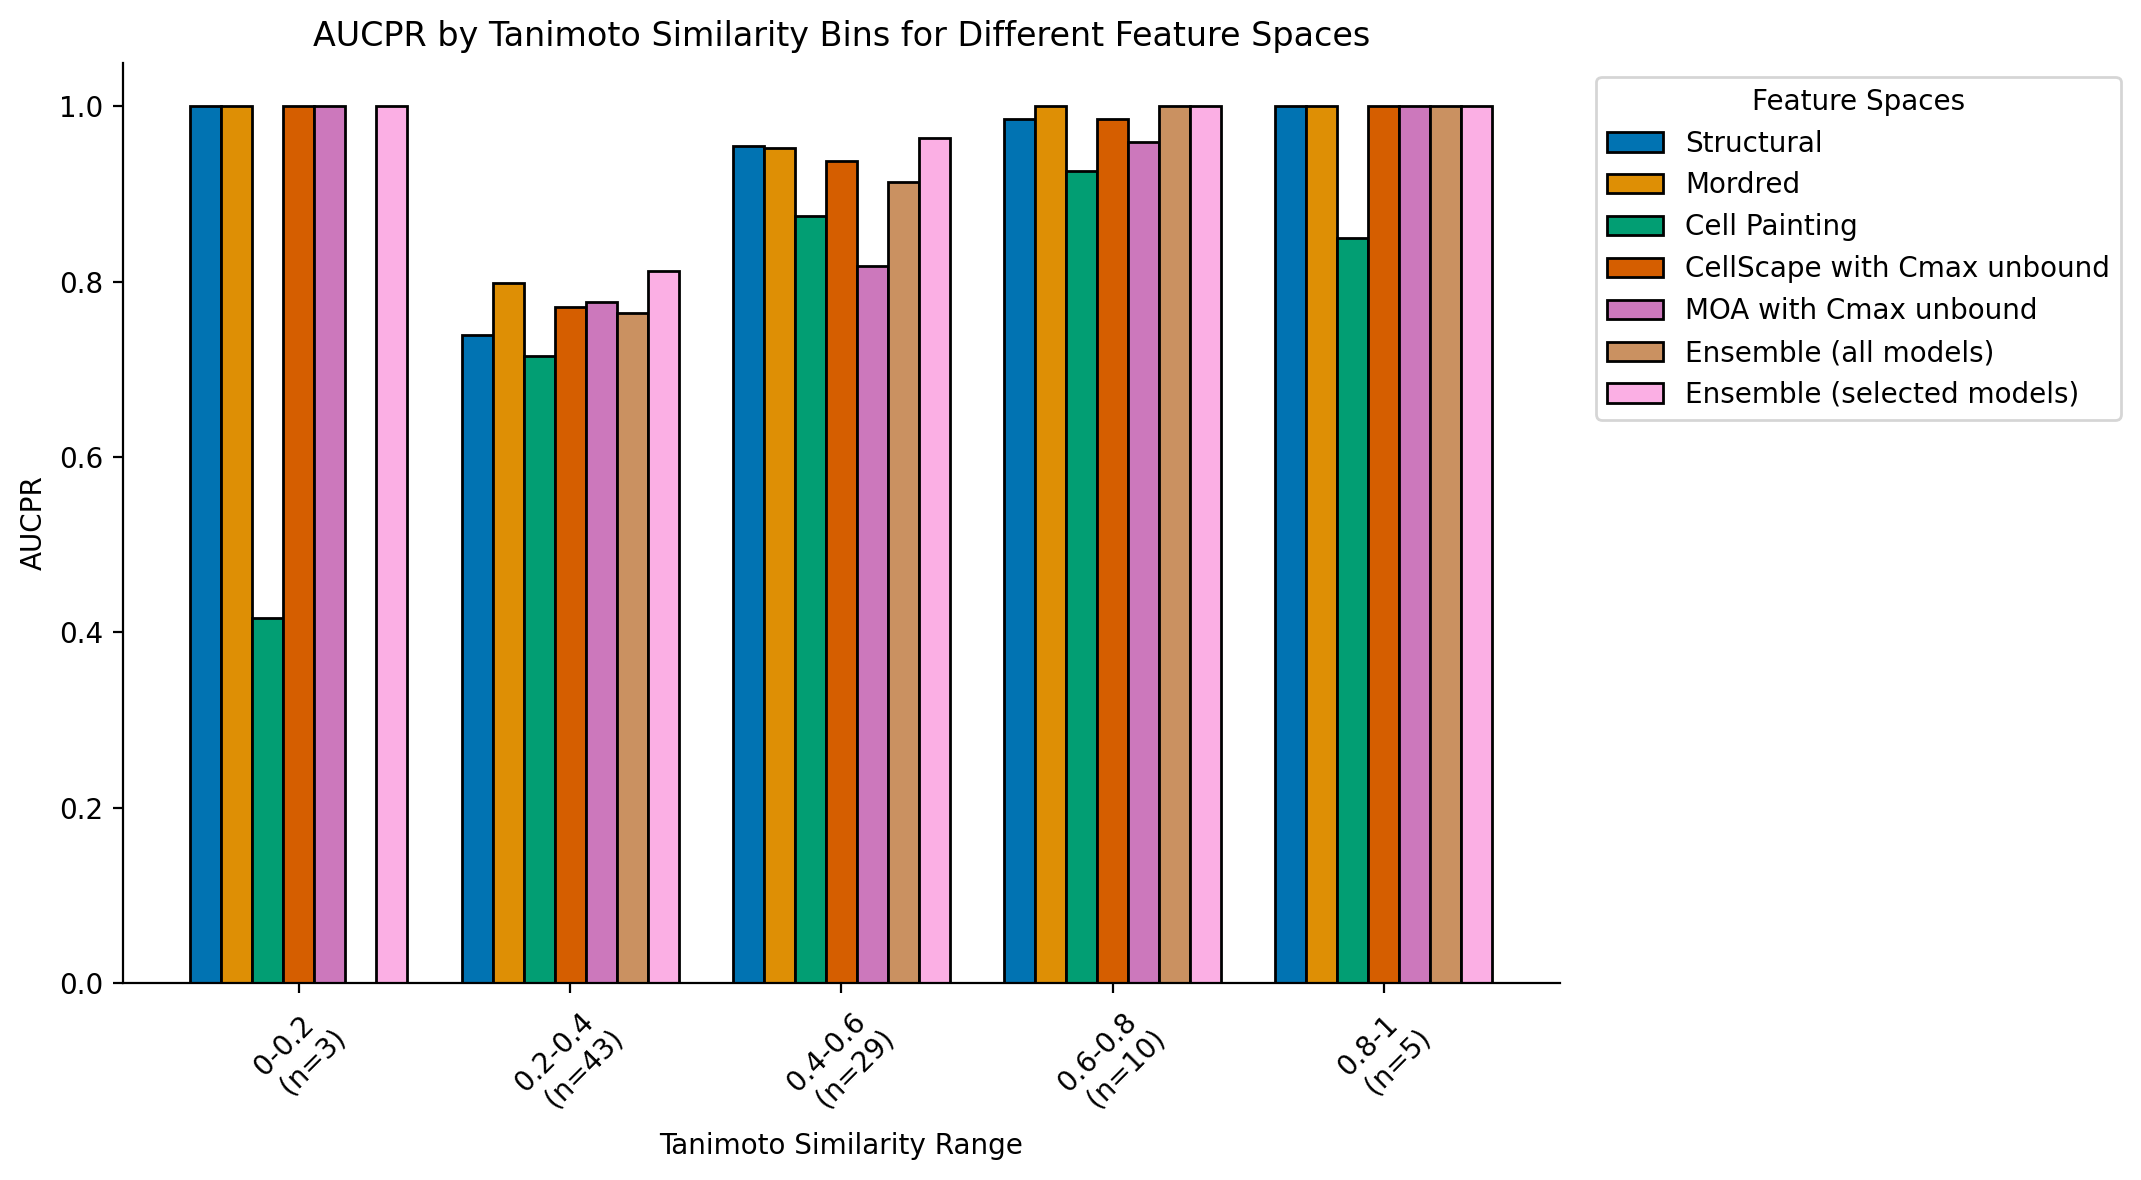

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  \
similarity_bin                                           
0-0.2 \n (n=3)       1.000000  1.000000       0.416667   
0.2-0.4 \n (n=43)    0.739592  0.798862       0.715762   
0.4-0.6 \n (n=29)    0.954985  0.952522       0.875356   
0.6-0.8 \n (n=10)    0.985243  1.000000       0.926240   
0.8-1 \n (n=5)       1.000000  1.000000       0.850000   

Features           CellScape with Cmax unbound  MOA with Cmax unbound  \
similarity_bin                                                          
0-0.2 \n (n=3)                        1.000000               1.000000   
0.2-0.4 \n (n=43)                     0.771218               0.776457   
0.4-0.6 \n (n=29)                     0.938221               0.817999   
0.6-0.8 \n (n=10)                     0.985243               0.959573   


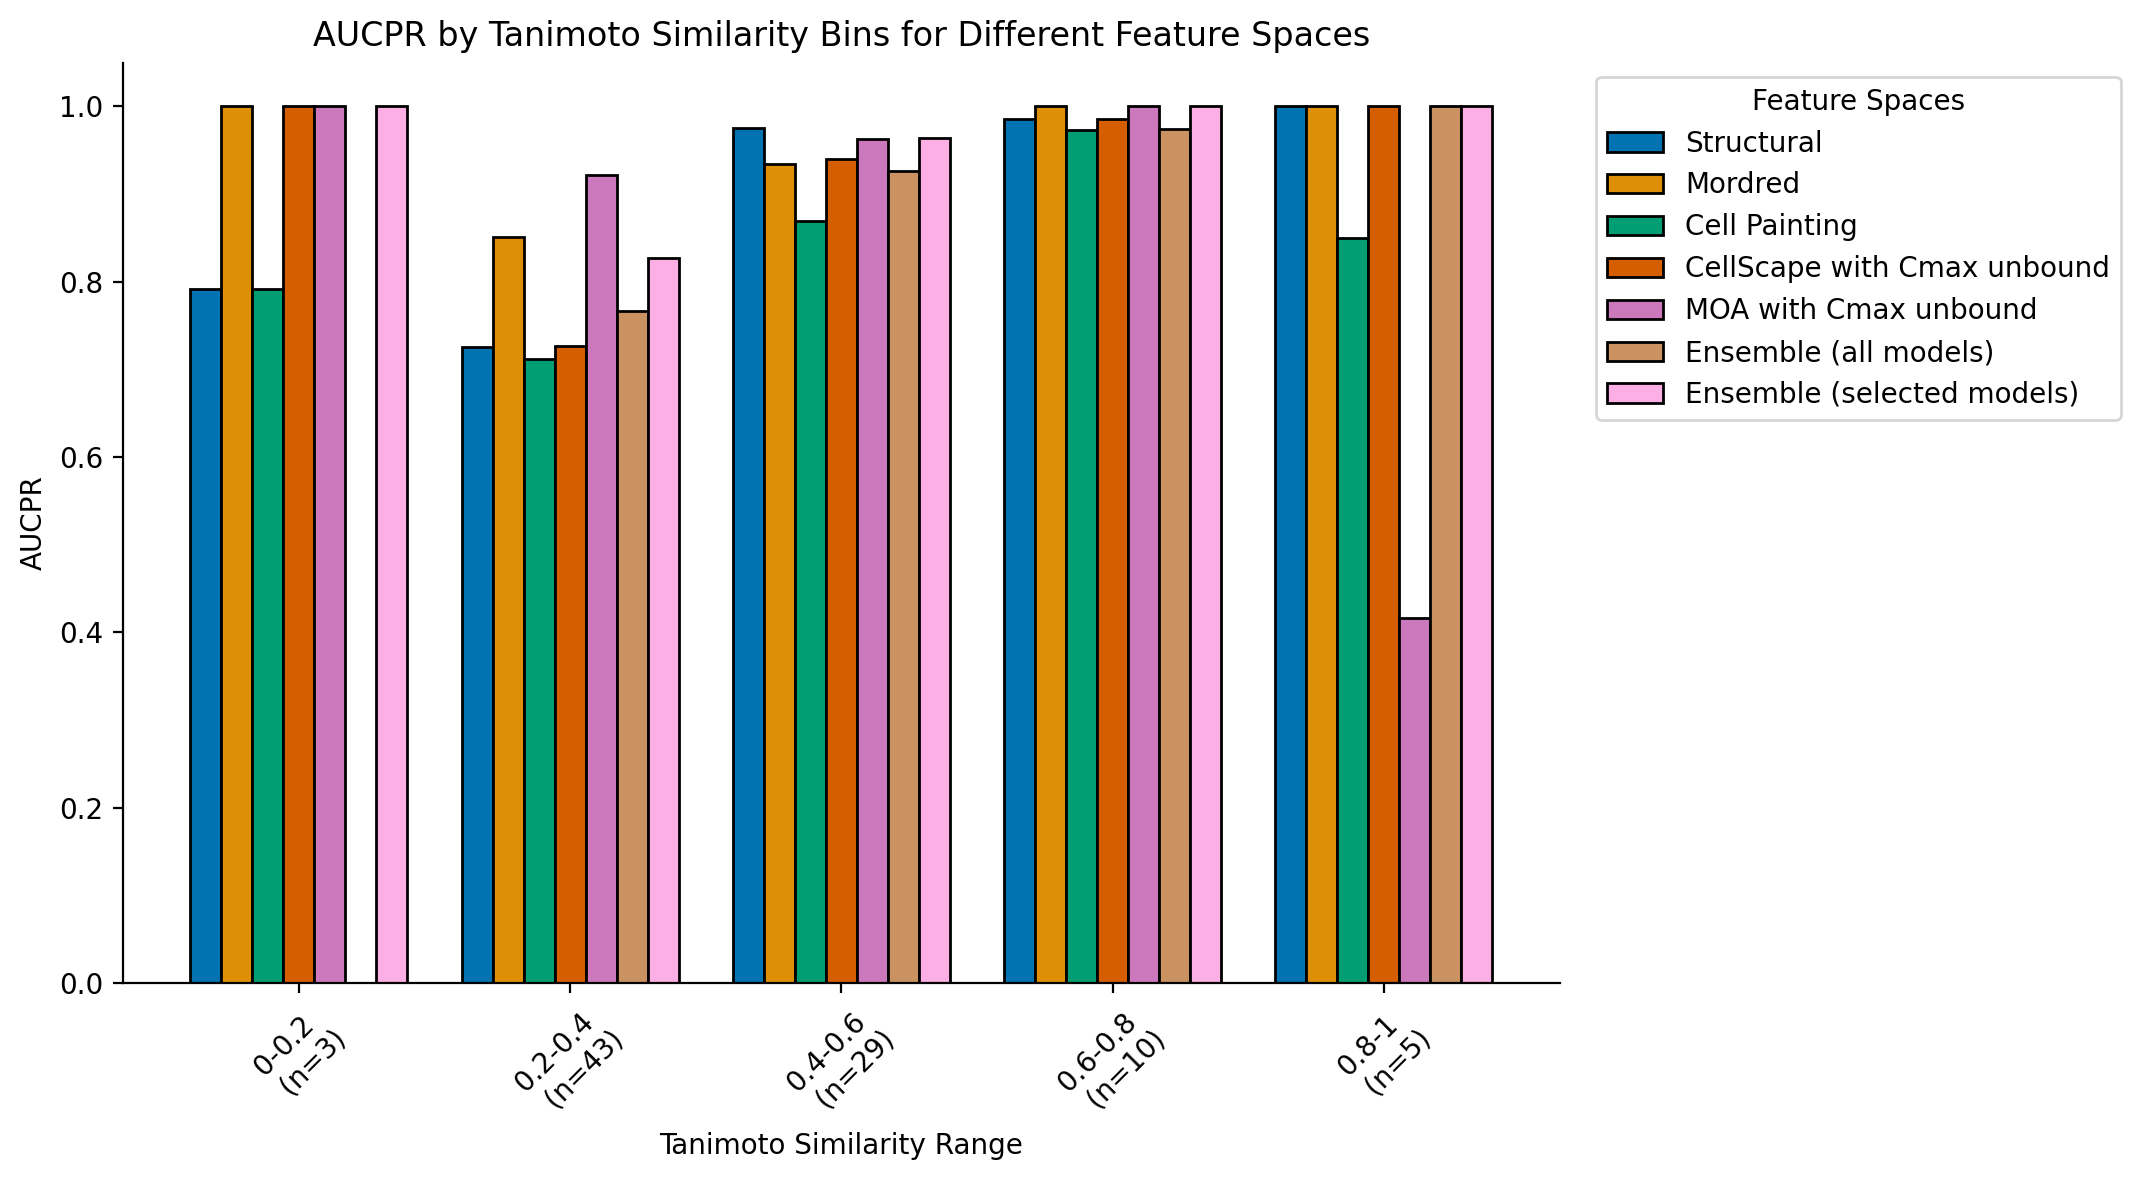

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  \
similarity_bin                                           
0-0.2 \n (n=3)       0.791667  1.000000       0.791667   
0.2-0.4 \n (n=43)    0.725984  0.851056       0.712318   
0.4-0.6 \n (n=29)    0.975551  0.934651       0.868899   
0.6-0.8 \n (n=10)    0.985243  1.000000       0.973611   
0.8-1 \n (n=5)       1.000000  1.000000       0.850000   

Features           CellScape with Cmax unbound  MOA with Cmax unbound  \
similarity_bin                                                          
0-0.2 \n (n=3)                        1.000000               1.000000   
0.2-0.4 \n (n=43)                     0.726483               0.921448   
0.4-0.6 \n (n=29)                     0.939592               0.963110   
0.6-0.8 \n (n=10)                     0.985243               1.000000   


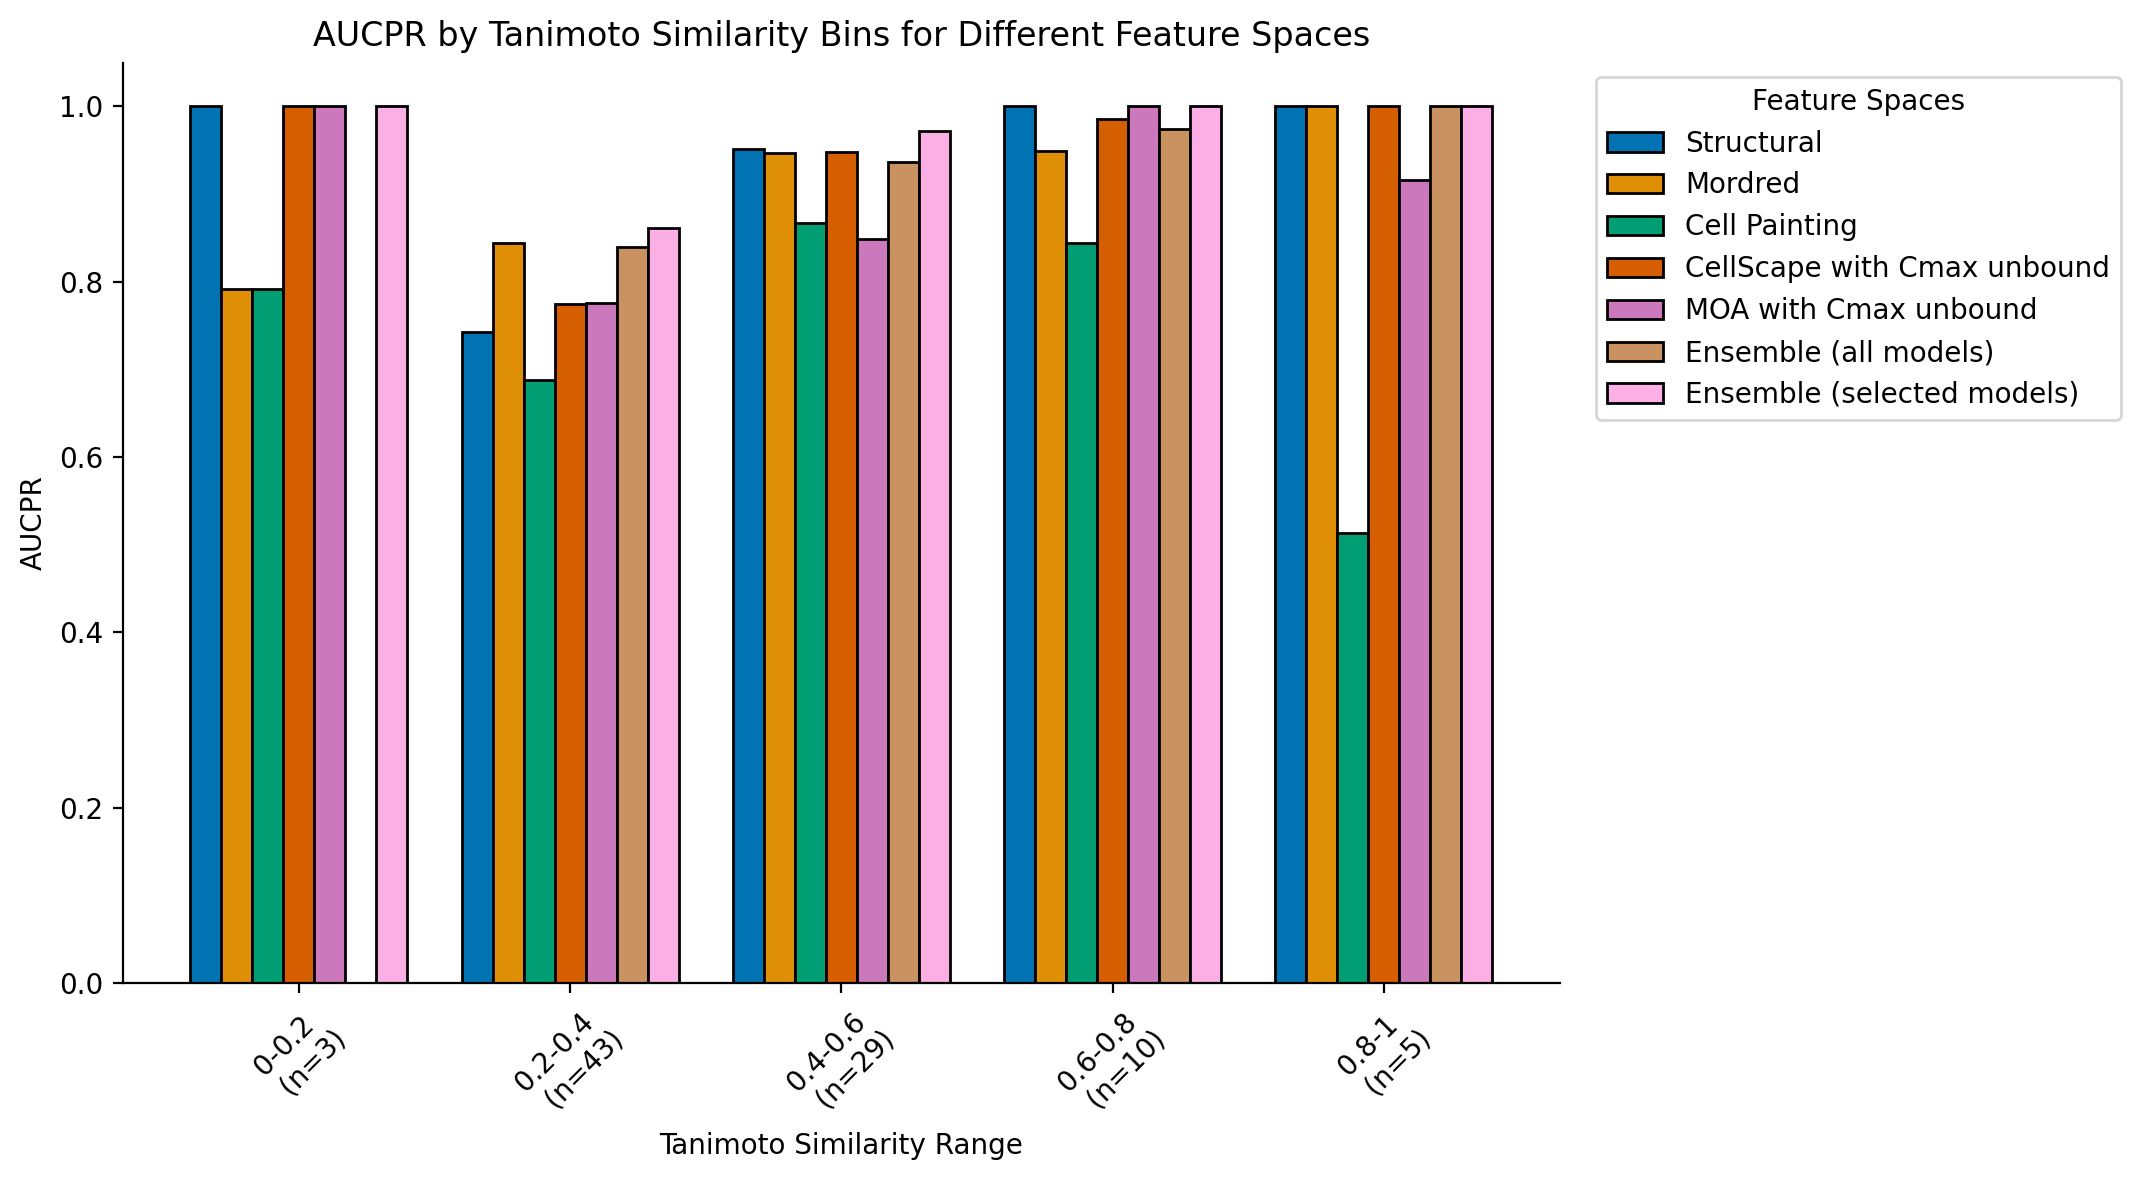

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  \
similarity_bin                                           
0-0.2 \n (n=3)       1.000000  0.791667       0.791667   
0.2-0.4 \n (n=43)    0.742471  0.844369       0.688098   
0.4-0.6 \n (n=29)    0.951344  0.947051       0.866725   
0.6-0.8 \n (n=10)    1.000000  0.949157       0.843800   
0.8-1 \n (n=5)       1.000000  1.000000       0.513889   

Features           CellScape with Cmax unbound  MOA with Cmax unbound  \
similarity_bin                                                          
0-0.2 \n (n=3)                        1.000000               1.000000   
0.2-0.4 \n (n=43)                     0.774251               0.775656   
0.4-0.6 \n (n=29)                     0.948584               0.848666   
0.6-0.8 \n (n=10)                     0.985243               1.000000   


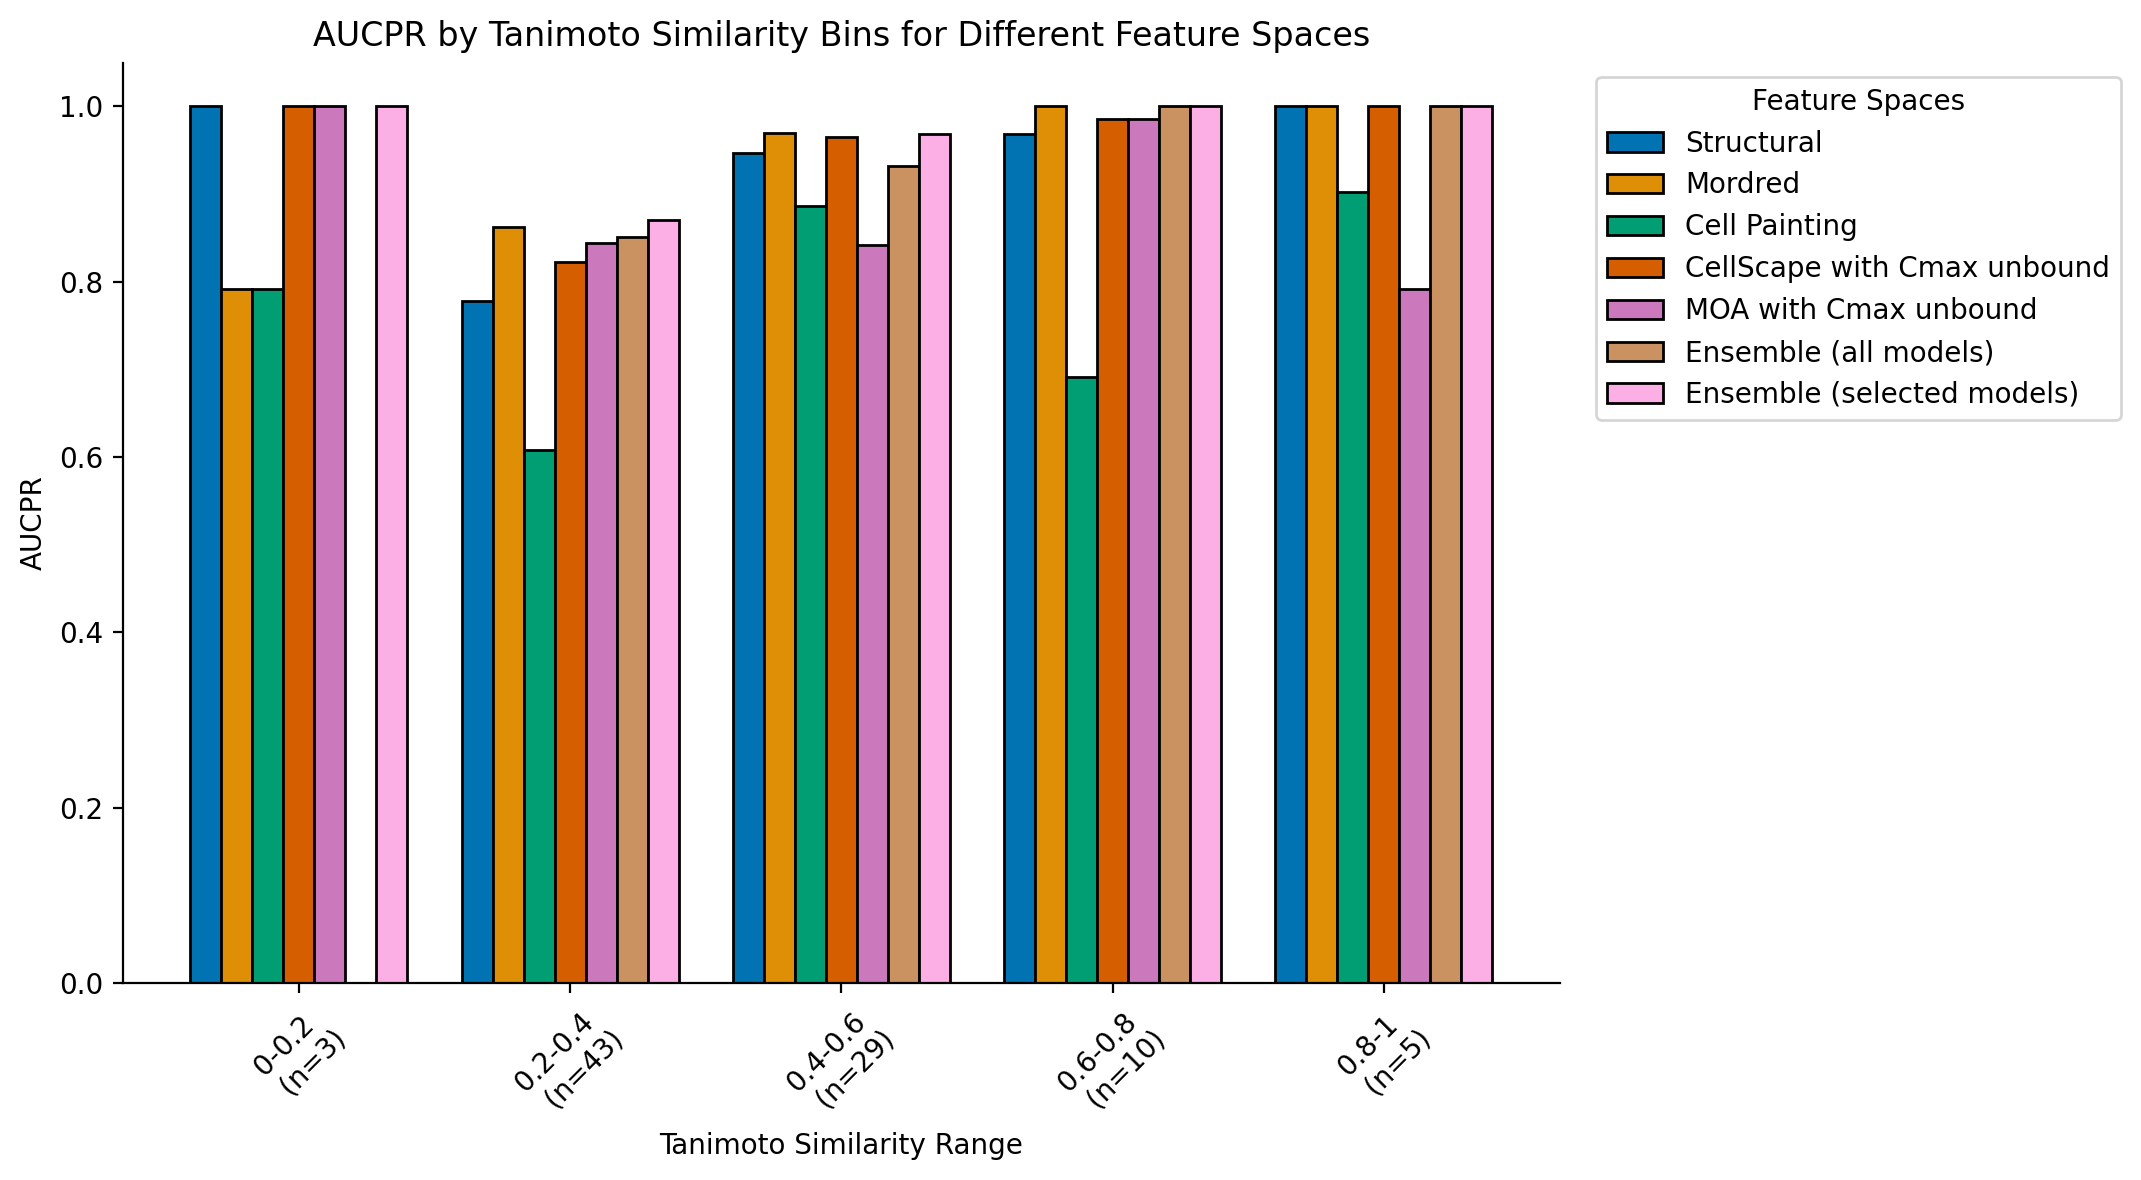

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64
Features           Structural   Mordred  Cell Painting  \
similarity_bin                                           
0-0.2 \n (n=3)       1.000000  0.791667       0.791667   
0.2-0.4 \n (n=43)    0.777774  0.862164       0.607519   
0.4-0.6 \n (n=29)    0.947471  0.969427       0.886256   
0.6-0.8 \n (n=10)    0.968502  1.000000       0.691419   
0.8-1 \n (n=5)       1.000000  1.000000       0.902778   

Features           CellScape with Cmax unbound  MOA with Cmax unbound  \
similarity_bin                                                          
0-0.2 \n (n=3)                        1.000000               1.000000   
0.2-0.4 \n (n=43)                     0.822317               0.844005   
0.4-0.6 \n (n=29)                     0.965209               0.841542   
0.6-0.8 \n (n=10)                     0.985243               0.985243   


In [21]:
import seaborn as sns

feature_order = ["Structural",
                "Mordred",
                  "Cell Painting",
                 "CellScape with Cmax unbound",
                "MOA with Cmax unbound",
                 "Ensemble (all models)", 
                 "Ensemble (selected models)"] # order


legend_text = ["Structural", 
               "Mordred",  
               "Cell Painting",
               "CellScape with Cmax unbound",
               "MOA with Cmax unbound",
               "Ensemble (all models)", 
               "Ensemble (selected models)"]

color_palette = sns.color_palette("colorblind", len(feature_order))

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
bin_labels = ['0-0.2 \n (n=3)', '0.2-0.4 \n (n=43)', '0.4-0.6 \n (n=29)',
              '0.6-0.8 \n (n=10)', '0.8-1 \n (n=5)']


for dataset in ['cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    
    print(dataset)
    dataset_results = allresults[allresults["Dataset"] == dataset]
    print(dataset_results.SMILES.nunique())
    
    dataset_results = pd.merge(dataset_results, test_df_similarity_nn, left_on="SMILES", right_on="Standardized_SMILES")
    # Create bins for the Mean_Tanimoto_Similarity values

    dataset_results['similarity_bin'] = pd.cut(dataset_results['Mean_Tanimoto_Similarity'], bins=bin_edges, labels=bin_labels, right=False)
   
    # Group by `similarity_bin` and `Features` and compute balanced accuracy
    aucpr_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(aucpr).reset_index()

    # Pivot the result for plotting
    pivot_df = aucpr_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
    # Reorder columns based on the specified order
    pivot_df = pivot_df[feature_order]

    # Plot
    plt.figure(figsize=(8, 6), dpi=200)
    pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
    plt.title('AUCPR by Tanimoto Similarity Bins for Different Feature Spaces')
    plt.xlabel('Tanimoto Similarity Range')
    plt.ylabel('AUCPR')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.grid(axis='y')


    # Create the legend
    plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.4, 1), title='Feature Spaces')

    # Show only x and y axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    
    #Plot numbers
    print(dataset_results[dataset_results["Features"]=="Structural"].similarity_bin.value_counts())
    print(pivot_df)


In [19]:
dataset_results[dataset_results["Features"]=="Structural"].similarity_bin.value_counts()

0.2-0.4 \n (n=43)    43
0.4-0.6 \n (n=29)    29
0.6-0.8 \n (n=10)    10
0.8-1 \n (n=5)        5
0-0.2 \n (n=3)        3
Name: similarity_bin, dtype: int64

In [57]:
pivot_df

Features,Structural,Mordred,CellScape with Cmax unbound,MOA with Cmax unbound,Ensemble_selected,Ensemble_all
similarity_bin,,,,,,
0-0.2 \n (n=3),0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
0.2-0.4 \n (n=43),0.583333,0.770833,0.604167,0.541667,0.604167,0.541667
0.4-0.6 \n (n=29),0.705128,0.782051,0.756410,0.589744,0.756410,0.673077
0.6-0.8 \n (n=10),1.000000,1.000000,0.500000,0.500000,1.000000,1.000000
0.8-1 \n (n=5),0.875000,0.875000,1.000000,0.750000,1.000000,1.000000


In [58]:
dataset_results[dataset_results["Features"]=="Structural"]

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features,Scaled_Probability,Standardized_SMILES,Standardized_InChI,DICTrank,Mean_Tanimoto_Similarity,similarity_bin
0,DICTrank,DICTrank,[NH3+]CC(CC(=O)[O-])c1ccc(Cl)cc1,1.0,0,0.477458,0.564024,Structural,0.423261,[NH3+]CC(CC(=O)[O-])c1ccc(Cl)cc1,InChI=1S/C10H12ClNO2/c11-9-3-1-7(2-4-9)8(6-12)...,1,0.346154,0.2-0.4 \n (n=43)
13,DICTrank,DICTrank,OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,1.0,1,0.645901,0.564024,Structural,0.593901,OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,InChI=1S/C21H27ClN2O2/c22-20-8-6-19(7-9-20)21(...,1,0.708333,0.6-0.8 \n (n=10)
26,DICTrank,DICTrank,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,1.0,0,0.512844,0.564024,Structural,0.454630,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,InChI=1S/C13H12F2N6O/c14-10-1-2-11(12(15)3-10)...,1,0.584906,0.4-0.6 \n (n=29)
39,DICTrank,DICTrank,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,1.0,1,0.586994,0.564024,Structural,0.526343,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0.571429,0.4-0.6 \n (n=29)
52,DICTrank,DICTrank,O=c1[n-]c2ccccc2n1C1CC[NH+](CCCC(c2ccc(F)cc2)c...,1.0,1,0.655646,0.564024,Structural,0.605078,O=c1[n-]c2ccccc2n1C1CC[NH+](CCCC(c2ccc(F)cc2)c...,InChI=1S/C28H29F2N3O/c29-22-11-7-20(8-12-22)25...,1,0.410959,0.4-0.6 \n (n=29)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,DICTrank,DICTrank,CC(=O)N=c1[n-]nc(S(N)(=O)=O)s1,0.0,0,0.545069,0.564024,Structural,0.483197,CC(=O)N=c1[n-]nc(S(N)(=O)=O)s1,InChI=1S/C4H6N4O3S2/c1-2(9)6-3-7-8-4(12-3)13(5...,0,0.487805,0.4-0.6 \n (n=29)
1014,DICTrank,DICTrank,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,0.0,0,0.499554,0.564024,Structural,0.442849,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-...,0,0.232143,0.2-0.4 \n (n=43)
1027,DICTrank,DICTrank,CC#CC1(O)CCC2C3=C(C4=C(CC3)CC(=O)CC4)C(c3ccc(N...,1.0,1,0.571646,0.564024,Structural,0.508741,CC#CC1(O)CCC2C3=C(C4=C(CC3)CC(=O)CC4)C(c3ccc(N...,InChI=1S/C29H35NO2/c1-5-15-29(32)16-14-26-24-1...,1,0.222222,0.2-0.4 \n (n=43)
1040,DICTrank,DICTrank,C=CC1C[NH+]2CCC1CC2C(O)c1ccnc2ccc(OC)cc12,1.0,1,0.609671,0.564024,Structural,0.552350,C=CC1C[NH+]2CCC1CC2C(O)c1ccnc2ccc(OC)cc12,InChI=1S/C20H24N2O2/c1-3-13-12-22-9-7-14(13)10...,1,0.225806,0.2-0.4 \n (n=43)


In [107]:
import seaborn as sns

color_palette = sns.color_palette("colorblind", len(feature_order))

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']


for dataset in ['cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    print(dataset)
    dataset_results = allresults[allresults["Dataset"] == dataset]
    print(dataset_results.SMILES.nunique())
    
    dataset_results = pd.merge(dataset_results, test_df_similarity_nn, left_on="SMILES", right_on="Standardized_SMILES")
    # Create bins for the Mean_Tanimoto_Similarity values

    dataset_results['similarity_bin'] = pd.cut(dataset_results['Mean_Tanimoto_Similarity'], bins=bin_edges, labels=bin_labels, right=False)


    # Group by `similarity_bin` and `Features` and compute balanced accuracy
    balanced_accuracy_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(sensitivity).reset_index()

    # Pivot the result for plotting
    pivot_df = balanced_accuracy_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
    # Reorder columns based on the specified order
    pivot_df = pivot_df[feature_order]

    # Plot
    plt.figure(figsize=(8, 6), dpi=200)
    pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
    plt.title('Sensitivity by Tanimoto Similarity Bins for Different Feature Spaces')
    plt.xlabel('Tanimoto Similarity Range')
    plt.ylabel('Sensitivity')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.grid(axis='y')


    # Create the legend
    plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.4, 1), title='Feature Spaces')

    # Show only x and y axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    print(dataset_results[dataset_results["Features"]=="Structural"].similarity_bin.value_counts())
    print(pivot_df)


cardiotox_with_sider_inactives
82


KeyError: "['Ensemble_selected', 'Ensemble_all'] not in index"